# mixMC 
<!-- 1. Case
    - Cholangiocarcinoma	6
    - Pancreatic 	25
2. Genus level
 -->

- Pancriatic Cancer (25)
- Collengio Carcinoma (6)

In [1]:
source("metagenomics_fns.R")

In [3]:
library("mixOmics")
library(tidyverse)

In [4]:
load("bile_ps_nodup_noenv_2160otu.phyloseq")

In [5]:
ps0 = ps1
ps0

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2160 taxa and 46 samples ]
sample_data() Sample Data:       [ 46 samples by 36 sample variables ]
tax_table()   Taxonomy Table:    [ 2160 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 2160 tips and 2101 internal nodes ]

In [6]:
sample_data(ps0) %>% head

BarcodeSequence   LinkerPrimerSequence  CaseID   SID        phincID   
bile12  TAAGGCGA+AAGGCTAT YATGCTGCCTCCCGTAGGAGT 2213-160 bile12_S6  bile12_S6 
bile13  TAAGGCGA+GAGCCTTA YATGCTGCCTCCCGTAGGAGT 2213-161 bile13_S7  bile13_S7 
bile14  TAAGGCGA+TTATGCGA YATGCTGCCTCCCGTAGGAGT 2213-162 bile14_S8  bile14_S8 
bile15L CGTACTAG+TCGACTAG YATGCTGCCTCCCGTAGGAGT 2213-163 bile15L_S9 bile15L_S9
bile16  CGTACTAG+CCTAGAGT YATGCTGCCTCCCGTAGGAGT 2213-165 bile16_S11 bile16_S11
bile17  CGTACTAG+GCGTAAGA YATGCTGCCTCCCGTAGGAGT 2213-167 bile17_S12 bile17_S12
        R1fp                                                
bile12  ../03_workingdata/Rs/bile12_S6_L001_R1_001.fastq.gz 
bile13  ../03_workingdata/Rs/bile13_S7_L001_R1_001.fastq.gz 
bile14  ../03_workingdata/Rs/bile14_S8_L001_R1_001.fastq.gz 
bile15L ../03_workingdata/Rs/bile15L_S9_L001_R1_001.fastq.gz
bile16  ../03_workingdata/Rs/bile16_S11_L001_R1_001.fastq.gz
bile17  ../03_workingdata/Rs/bile17_S12_L001_R1_001.fastq.gz
        R2fp                                                 duplicate
bile12  ../03_workingdata/Rs/bile12_S6_L001_R2_001.fastq.gz  0        
bile13  ../03_workingdata/Rs/bile13_S7_L001_R2_001.fastq.gz  0        
bile14  ../03_workingdata/Rs/bile14_S8_L001_R2_001.fastq.gz  0        
bile15L ../03_workingdata/Rs/bile15L_S9_L001_R2_001.fastq.gz 1        
bile16  ../03_workingdata/Rs/bile16_S11_L001_R2_001.fastq.gz 0        
bile17  ../03_workingdata/Rs/bile17_S12_L001_R2_001.fastq.gz 0        
        env_samples extraction ⋯
bile12  0           first      ⋯
bile13  0           first      ⋯
bile14  0           first      ⋯
bile15L 0           first      ⋯
bile16  0           first      ⋯
bile17  0           first      ⋯
        Treatment_status_at_the_time_of_bile_collection
bile12  Status post/during cancer therapy              
bile13  Status post/during cancer therapy              
bile14                                                 
bile15L                                                
bile16                                                 
bile17  Status post/during cancer therapy              
        Working_diagnosis                               Date_of_Birth
bile12                                                  1953-02-21   
bile13                                                  1945-12-08   
bile14  Jaundice (Dilated bile duct with elevated LFTs)              
bile15L Jaundice (Dilated bile duct with elevated LFTs)              
bile16  Primary Sclerosing Cholangitis                               
bile17                                                  1942-09-09   
        Date_of_Progression Date_of_diagnosis Date_of_Surgery Date_of_death
bile12                      2016-11-02                                     
bile13  2018-12-30 00:00:00 2015-05-13                                     
bile14                                                                     
bile15L                                                                    
bile16                                                                     
bile17  2018-11-14 00:00:00 2018-06-07                                     
        Date_of_last_follow_up
bile12  2019-06-18            
bile13  2019-01-10            
bile14                        
bile15L                       
bile16                        
bile17  2019-06-14            
        age_at_the_time_of_bile_collection_for_both_case_and_control
bile12  63                                                          
bile13  69                                                          
bile14  73                                                          
bile15L 36                                                          
bile16  57                                                          
bile17  76                                                          
        Description
bile12  BileMB_2019
bile13  BileMB_2019
bile14  BileMB_2019
bile15L BileMB_2019
bile16  BileMB_2019
bile17  BileMB_2019

In [7]:
tot = sample_data(ps0)$Type_of_Tumor
table(tot)
tot_nn = list()
for(i in 1:length(tot)){
    n = as.character(tot[i])
    if( n == "Ampullary carcinoma"){
        # print("Pancreatic")
        tot_nn[i] = "Pancreatic"
    }else{
        tot_nn[i] = n
        # print(n)
    }
}

tot_nn = as.character(tot_nn)
table(tot_nn)
sample_data(ps0)$Type_of_Tumor = tot_nn

tot
                          Ampullary carcinoma Carcinoma Gall Bladder 
                    14                      1                      1 
    Cholangiocarcinoma             Pancreatic 
                     6                     24 

tot_nn
                       Carcinoma Gall Bladder     Cholangiocarcinoma 
                    14                      1                      6 
            Pancreatic 
                    25 

In [8]:
fct_count(get_variable(ps0, "Type_of_Tumor"))

f                      n 
1                        14
2 Carcinoma Gall Bladder  1
3 Cholangiocarcinoma      6
4 Pancreatic             25

In [9]:
ps0_case = subset_samples(ps0, treatment=="Case")
ps0_case = prune_taxa(taxa_sums(ps0_case)>1, ps0_case)
ps0_case = prune_samples(sample_sums(ps0_case)>1, ps0_case)
ps0_case 
ps0_case = subset_samples(ps0_case, Type_of_Tumor !="Carcinoma Gall Bladder")
ps0_case = prune_taxa(taxa_sums(ps0_case)>1, ps0_case)
ps0_case = prune_samples(sample_sums(ps0_case)>1, ps0_case)
ps0_case

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1608 taxa and 32 samples ]
sample_data() Sample Data:       [ 32 samples by 36 sample variables ]
tax_table()   Taxonomy Table:    [ 1608 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1608 tips and 1567 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1571 taxa and 31 samples ]
sample_data() Sample Data:       [ 31 samples by 36 sample variables ]
tax_table()   Taxonomy Table:    [ 1571 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1571 tips and 1533 internal nodes ]

In [10]:
fct_count(get_variable(ps0_case, "Type_of_Tumor"))

f                  n 
1 Cholangiocarcinoma  6
2 Pancreatic         25

In [11]:
# Genus

In [12]:
ps0_g = tax_glom(ps0_case, taxrank = "Genus", NArm=TRUE, bad_empty=c(NA, "", " ", "\t"))

In [13]:
ps0_g

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 274 taxa and 31 samples ]
sample_data() Sample Data:       [ 31 samples by 36 sample variables ]
tax_table()   Taxonomy Table:    [ 274 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 274 tips and 273 internal nodes ]

In [14]:
ps0_g = prune_taxa(taxa_sums(ps0_g)>1, ps0_g)
ps0_g = prune_samples(sample_sums(ps0_g)>1, ps0_g)
ps0_g

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 274 taxa and 31 samples ]
sample_data() Sample Data:       [ 31 samples by 36 sample variables ]
tax_table()   Taxonomy Table:    [ 274 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 274 tips and 273 internal nodes ]

In [15]:
otu_table(ps0_g) %>% head

bile12 bile13 bile17 bile22L bile23 bile24
76672d4d8a231eda68421067c54a0e5a   0      0     7     0       0       0    
b0422f7cce6c12900b73251c703bda99   0      9     0     0       0       0    
eedb940b50581c64e3b5edf8f24e7617   2      0     0     0       0       6    
d811f8dc5623fda159105cc98adc47df   0      0     0     0       0       0    
de5ca9cd912db2a4c21e146287db30ab 854    679    10     0       0      55    
d4d6030b0bf125db50c8a4a34282175c   0      0     0     0       0       0    
                                 bile26 bile29 bile30 bile31 ⋯ bile44L bileAM
76672d4d8a231eda68421067c54a0e5a 0       0     0      0      ⋯   0     0     
b0422f7cce6c12900b73251c703bda99 0       0     0      0      ⋯   0     0     
eedb940b50581c64e3b5edf8f24e7617 2       0     0      0      ⋯   0     0     
d811f8dc5623fda159105cc98adc47df 0      93     0      0      ⋯   0     0     
de5ca9cd912db2a4c21e146287db30ab 0       0     0      0      ⋯ 107     0     
d4d6030b0bf125db50c8a4a34282175c 0       0     0      0      ⋯   0     0     
                                 bileC bileDM bileE bileFM bileG bileH bileIL
76672d4d8a231eda68421067c54a0e5a 0     0       0    0        0     0     0   
b0422f7cce6c12900b73251c703bda99 0     0       0    0        0     0     0   
eedb940b50581c64e3b5edf8f24e7617 0     0       0    0        0     0     0   
d811f8dc5623fda159105cc98adc47df 0     0       0    0        0     0     0   
de5ca9cd912db2a4c21e146287db30ab 0     0      95    0      142     0   113   
d4d6030b0bf125db50c8a4a34282175c 0     0       0    0        0   417     0   
                                 bileJM
76672d4d8a231eda68421067c54a0e5a 0     
b0422f7cce6c12900b73251c703bda99 0     
eedb940b50581c64e3b5edf8f24e7617 0     
d811f8dc5623fda159105cc98adc47df 0     
de5ca9cd912db2a4c21e146287db30ab 0     
d4d6030b0bf125db50c8a4a34282175c 0

In [16]:
fct_count(get_variable(ps0_g, "treatment"))

f    n 
1 Case 31

In [17]:
fct_count(get_variable(ps0_g, "Type_of_Tumor"))

f                  n 
1 Cholangiocarcinoma  6
2 Pancreatic         25

In [18]:
ps0_g

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 274 taxa and 31 samples ]
sample_data() Sample Data:       [ 31 samples by 36 sample variables ]
tax_table()   Taxonomy Table:    [ 274 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 274 tips and 273 internal nodes ]

In [19]:
otu = as.matrix(t(otu_table(ps0_g)))

In [20]:
otu_table(ps0_g) %>% head

bile12 bile13 bile17 bile22L bile23 bile24
76672d4d8a231eda68421067c54a0e5a   0      0     7     0       0       0    
b0422f7cce6c12900b73251c703bda99   0      9     0     0       0       0    
eedb940b50581c64e3b5edf8f24e7617   2      0     0     0       0       6    
d811f8dc5623fda159105cc98adc47df   0      0     0     0       0       0    
de5ca9cd912db2a4c21e146287db30ab 854    679    10     0       0      55    
d4d6030b0bf125db50c8a4a34282175c   0      0     0     0       0       0    
                                 bile26 bile29 bile30 bile31 ⋯ bile44L bileAM
76672d4d8a231eda68421067c54a0e5a 0       0     0      0      ⋯   0     0     
b0422f7cce6c12900b73251c703bda99 0       0     0      0      ⋯   0     0     
eedb940b50581c64e3b5edf8f24e7617 2       0     0      0      ⋯   0     0     
d811f8dc5623fda159105cc98adc47df 0      93     0      0      ⋯   0     0     
de5ca9cd912db2a4c21e146287db30ab 0       0     0      0      ⋯ 107     0     
d4d6030b0bf125db50c8a4a34282175c 0       0     0      0      ⋯   0     0     
                                 bileC bileDM bileE bileFM bileG bileH bileIL
76672d4d8a231eda68421067c54a0e5a 0     0       0    0        0     0     0   
b0422f7cce6c12900b73251c703bda99 0     0       0    0        0     0     0   
eedb940b50581c64e3b5edf8f24e7617 0     0       0    0        0     0     0   
d811f8dc5623fda159105cc98adc47df 0     0       0    0        0     0     0   
de5ca9cd912db2a4c21e146287db30ab 0     0      95    0      142     0   113   
d4d6030b0bf125db50c8a4a34282175c 0     0       0    0        0   417     0   
                                 bileJM
76672d4d8a231eda68421067c54a0e5a 0     
b0422f7cce6c12900b73251c703bda99 0     
eedb940b50581c64e3b5edf8f24e7617 0     
d811f8dc5623fda159105cc98adc47df 0     
de5ca9cd912db2a4c21e146287db30ab 0     
d4d6030b0bf125db50c8a4a34282175c 0

In [21]:
otu%>% head

76672d4d8a231eda68421067c54a0e5a b0422f7cce6c12900b73251c703bda99
bile12  0                                0                               
bile13  0                                9                               
bile17  7                                0                               
bile22L 0                                0                               
bile23  0                                0                               
bile24  0                                0                               
        eedb940b50581c64e3b5edf8f24e7617 d811f8dc5623fda159105cc98adc47df
bile12  2                                0                               
bile13  0                                0                               
bile17  0                                0                               
bile22L 0                                0                               
bile23  0                                0                               
bile24  6                                0                               
        de5ca9cd912db2a4c21e146287db30ab d4d6030b0bf125db50c8a4a34282175c
bile12  854                              0                               
bile13  679                              0                               
bile17   10                              0                               
bile22L   0                              0                               
bile23    0                              0                               
bile24   55                              0                               
        c697ccc7bd28fa714ab543209b1e8a3c 58423989a0d6837c4195085c6ff6ed5e
bile12  0                                 73                             
bile13  0                                389                             
bile17  0                                  7                             
bile22L 0                                  6                             
bile23  0                                 94                             
bile24  0                                  4                             
        da4beaaa85adbb0731cbb693b603e7e0 a20494e5b195ca6bc12bd7b9d143540b ⋯
bile12  0                                 120                             ⋯
bile13  0                                3411                             ⋯
bile17  0                                  45                             ⋯
bile22L 0                                   0                             ⋯
bile23  0                                 543                             ⋯
bile24  0                                2695                             ⋯
        b08e961b9618c77a3d1fd1087dfdb251 70771f216b7ff2d022f89271bc1b0e6f
bile12  0                                0                               
bile13  0                                0                               
bile17  0                                0                               
bile22L 0                                0                               
bile23  0                                0                               
bile24  0                                0                               
        a84a41a115e5a50693df684aecc370a6 97a2b671937c8b87873c706b95988aca
bile12     0                             0                               
bile13  1601                             0                               
bile17     0                             0                               
bile22L    0                             0                               
bile23   102                             0                               
bile24     0                             0                               
        d7d775c37da625dd35f82ea762b67b4d 03e6b6aefa7688a7ccf4cdd026e67cb2
bile12  13                               0                               
bile13  60                               0                               
bile17   0                               0                               
bile22L  0                               0                              

In [22]:
otu %>% dim

[1]  31 274

In [23]:
otu = otu + 1

In [24]:
sum(which(otu == 0))

[1] 0

In [25]:
# prefiltering
low.count.removal = function(
                        data, # OTU count data frame of size n (sample) x p (OTU)
                        percent=0.01 # cutoff chosen
                        ){
    keep.otu = which(colSums(data)*100/(sum(colSums(data))) > percent)
    data.filter = data[,keep.otu]
    return(list(data.filter = data.filter, keep.otu = keep.otu))
}

# each variable read count is divided by the total number of read counts
TSS.divide = function(x){
 x/sum(x)
}

In [26]:
result.filter = low.count.removal(otu, percent=0.05)
data.filter = result.filter$data.filter
length(result.filter$keep.otu) # check the number of variables kept after filtering

[1] 101

In [27]:
data.TSS = t(apply(data.filter, 1, TSS.divide))

In [28]:
data.TSS %>% dim

[1]  31 101

In [29]:
data.TSS %>% head

de5ca9cd912db2a4c21e146287db30ab d4d6030b0bf125db50c8a4a34282175c
bile12  2.018986e-02                     2.361387e-05                    
bile13  2.971249e-02                     4.369484e-05                    
bile17  1.181018e-03                     1.073653e-04                    
bile22L 8.890469e-05                     8.890469e-05                    
bile23  4.506128e-05                     4.506128e-05                    
bile24  1.751040e-03                     3.126857e-05                    
        58423989a0d6837c4195085c6ff6ed5e a20494e5b195ca6bc12bd7b9d143540b
bile12  0.0017474261                     2.857278e-03                    
bile13  0.0170409858                     1.490868e-01                    
bile17  0.0008589221                     4.938802e-03                    
bile22L 0.0006223329                     8.890469e-05                    
bile23  0.0042808219                     2.451334e-02                    
bile24  0.0001563428                     8.430005e-02                    
        51032d1c9b7eb61f0e951e172375130a ddb6ce8f81290bcfad06e7e3f9cf05f1
bile12  2.361387e-05                     2.550298e-03                    
bile13  2.184742e-04                     8.564188e-02                    
bile17  1.073653e-04                     1.288383e-03                    
bile22L 8.890469e-05                     8.890469e-04                    
bile23  4.506128e-05                     1.577145e-03                    
bile24  3.126857e-05                     3.126857e-05                    
        6f425f48ebe9ca18532a80bf3b5cb58d 060fa769be38523fd4e5978f03ee9d7e
bile12  1.652971e-04                     2.361387e-05                    
bile13  4.369484e-05                     4.369484e-05                    
bile17  5.368263e-03                     1.073653e-04                    
bile22L 8.890469e-05                     8.890469e-05                    
bile23  5.227109e-03                     1.351839e-04                    
bile24  3.126857e-05                     3.126857e-05                    
        324e5d5e1a7f2e529a85b6bfc35803d9 6e61bb80b1f1bfe0d3cdfac8dab282a5 ⋯
bile12  2.361387e-05                     1.180693e-04                     ⋯
bile13  4.369484e-05                     4.369484e-05                     ⋯
bile17  1.073653e-04                     1.073653e-04                     ⋯
bile22L 8.890469e-05                     8.890469e-05                     ⋯
bile23  4.506128e-05                     3.740087e-03                     ⋯
bile24  3.126857e-05                     3.126857e-05                     ⋯
        9f41a60a84ff1e20f5a765165ae0f05a a75892dee301b33c533b8233d9e29108
bile12  2.361387e-05                     2.361387e-05                    
bile13  4.369484e-05                     4.369484e-05                    
bile17  2.319090e-02                     2.362036e-02                    
bile22L 8.890469e-05                     8.890469e-05                    
bile23  4.506128e-05                     4.506128e-05                    
bile24  3.126857e-05                     3.126857e-05                    
        0e70cac4e183125cde27e68f543069b8 905df2631f9541a2b48b12686168097b
bile12  2.361387e-05                     2.361387e-05                    
bile13  4.369484e-05                     4.369484e-05                    
bile17  1.073653e-04                     1.073653e-04                    
bile22L 8.890469e-05                     8.890469e-05                    
bile23  4.506128e-05                     4.506128e-05                    
bile24  3.126857e-05                     3.126857e-05                    
        b08e961b9618c77a3d1fd1087dfdb251 a84a41a115e5a50693df684aecc370a6
bile12  2.361387e-05                     2.361387e-05                    
bile13  4.369484e-05                     6.999913e-02                    
bile17  1.073653e-04                     1.073653e-04                    
bile22L 8.890469e-05                     8.890469e-05                   

In [30]:
colnames(data.TSS) %>% head

[1] "de5ca9cd912db2a4c21e146287db30ab" "d4d6030b0bf125db50c8a4a34282175c"
[3] "58423989a0d6837c4195085c6ff6ed5e" "a20494e5b195ca6bc12bd7b9d143540b"
[5] "51032d1c9b7eb61f0e951e172375130a" "ddb6ce8f81290bcfad06e7e3f9cf05f1"

In [31]:
mg.find_otu = function (ps, otu_name) 
{
    res = tax_table(ps)[as.character(otu_name)]
    return(as.character(res))
}

In [32]:
genus_names = as.character(sapply(colnames(data.TSS), function(x){ as.character(mg.find_otu(ps = ps0, x)[6]) }))

In [33]:
colnames_data = colnames(data.TSS)
nnames = list()
for(i in c(1: ncol(data.TSS))){
    if(genus_names[i] == "D_5__NA"){
        n = paste0("OTU",i,"_",genus_names[i])
        nnames[i] = n
    }else{
        n = paste0("OTU",i,"_",gsub('D_5__','', genus_names[i]))
        nnames[i] = n
    }
}

In [34]:
dfx = cbind(colnames_data,genus_names,nnames)

In [35]:
colnames(data.TSS) = nnames

In [36]:
data.TSS %>% head

OTU1_Campylobacter OTU2_Akkermansia OTU3_Alloprevotella
bile12  2.018986e-02       2.361387e-05     0.0017474261       
bile13  2.971249e-02       4.369484e-05     0.0170409858       
bile17  1.181018e-03       1.073653e-04     0.0008589221       
bile22L 8.890469e-05       8.890469e-05     0.0006223329       
bile23  4.506128e-05       4.506128e-05     0.0042808219       
bile24  1.751040e-03       3.126857e-05     0.0001563428       
        OTU4_Prevotella 7 OTU5_Prevotella 6 OTU6_Prevotella OTU7_Bacteroides
bile12  2.857278e-03      2.361387e-05      2.550298e-03    1.652971e-04    
bile13  1.490868e-01      2.184742e-04      8.564188e-02    4.369484e-05    
bile17  4.938802e-03      1.073653e-04      1.288383e-03    5.368263e-03    
bile22L 8.890469e-05      8.890469e-05      8.890469e-04    8.890469e-05    
bile23  2.451334e-02      4.506128e-05      1.577145e-03    5.227109e-03    
bile24  8.430005e-02      3.126857e-05      3.126857e-05    3.126857e-05    
        OTU8_Alistipes OTU9_Capnocytophaga OTU10_Bergeyella ⋯
bile12  2.361387e-05   2.361387e-05        1.180693e-04     ⋯
bile13  4.369484e-05   4.369484e-05        4.369484e-05     ⋯
bile17  1.073653e-04   1.073653e-04        1.073653e-04     ⋯
bile22L 8.890469e-05   8.890469e-05        8.890469e-05     ⋯
bile23  1.351839e-04   4.506128e-05        3.740087e-03     ⋯
bile24  3.126857e-05   3.126857e-05        3.126857e-05     ⋯
        OTU92_Coprococcus 3 OTU93_uncultured OTU94_Dorea 
bile12  2.361387e-05        2.361387e-05     2.361387e-05
bile13  4.369484e-05        4.369484e-05     4.369484e-05
bile17  2.319090e-02        2.362036e-02     1.073653e-04
bile22L 8.890469e-05        8.890469e-05     8.890469e-05
bile23  4.506128e-05        4.506128e-05     4.506128e-05
bile24  3.126857e-05        3.126857e-05     3.126857e-05
        OTU95_[Ruminococcus] gauvreauii group
bile12  2.361387e-05                         
bile13  4.369484e-05                         
bile17  1.073653e-04                         
bile22L 8.890469e-05                         
bile23  4.506128e-05                         
bile24  3.126857e-05                         
        OTU96_[Ruminococcus] torques group OTU97_Oribacterium
bile12  2.361387e-05                       2.361387e-05      
bile13  4.369484e-05                       6.999913e-02      
bile17  1.073653e-04                       1.073653e-04      
bile22L 8.890469e-05                       8.890469e-05      
bile23  4.506128e-05                       4.641312e-03      
bile24  3.126857e-05                       3.126857e-05      
        OTU98_Lachnoanaerobaculum OTU99_Stomatobaculum OTU100_Lachnoclostridium
bile12  3.305941e-04              2.361387e-05         2.361387e-05            
bile13  2.665385e-03              4.369484e-05         4.369484e-05            
bile17  1.073653e-04              1.073653e-04         1.073653e-04            
bile22L 8.890469e-05              8.890469e-05         8.890469e-05            
bile23  4.506128e-05              4.506128e-05         4.506128e-05            
bile24  3.126857e-05              3.126857e-05         3.126857e-05            
        OTU101_Blautia
bile12  2.361387e-05  
bile13  4.369484e-05  
bile17  1.599742e-02  
bile22L 8.890469e-05  
bile23  4.506128e-05  
bile24  3.126857e-05

# CLR transformation

In [38]:
# library(propr)

In [39]:
Y  =  as.factor(sample_data(ps0_g)$Type_of_Tumor)
summary(Y)

Cholangiocarcinoma         Pancreatic 
                 6                 25

In [40]:
nlevels(Y)

[1] 2

In [41]:
# ?plsda

In [42]:
d.plsda = plsda(X = data.TSS, Y, ncomp = nlevels(Y), logratio = 'CLR')
d.perf.plsda = perf(d.plsda, validation = 'Mfold', folds = 10, progressBar = F, nrepeat = 10, auc = T)

Warning message in MCVfold.spls(X, Y, multilevel = multilevel, validation = validation, :
“At least one class is not represented in one fold, which may unbalance the error rate.
  Consider a number of folds lower than the minimum in table(Y): 6”
Warning message in MCVfold.spls(X, Y, multilevel = multilevel, validation = validation, :
“At least one class is not represented in one fold, which may unbalance the error rate.
  Consider a number of folds lower than the minimum in table(Y): 6”


In [43]:
d.perf.plsda


Call:
 perf.mixo_plsda(object = d.plsda, validation = "Mfold", folds = 10, nrepeat = 10, auc = T, progressBar = F) 

 Main numerical outputs: 
 -------------------- 
 Error rate (overall or BER) for each component and for each distance: see object$error.rate 
 Error rate per class, for each component and for each distance: see object$error.rate.class 
 Prediction values for each component: see object$predict 
 Classification of each sample, for each component and for each distance: see object$class 
 AUC values: see object$auc if auc = TRUE 

 Visualisation Functions: 
 -------------------- 
 plot 

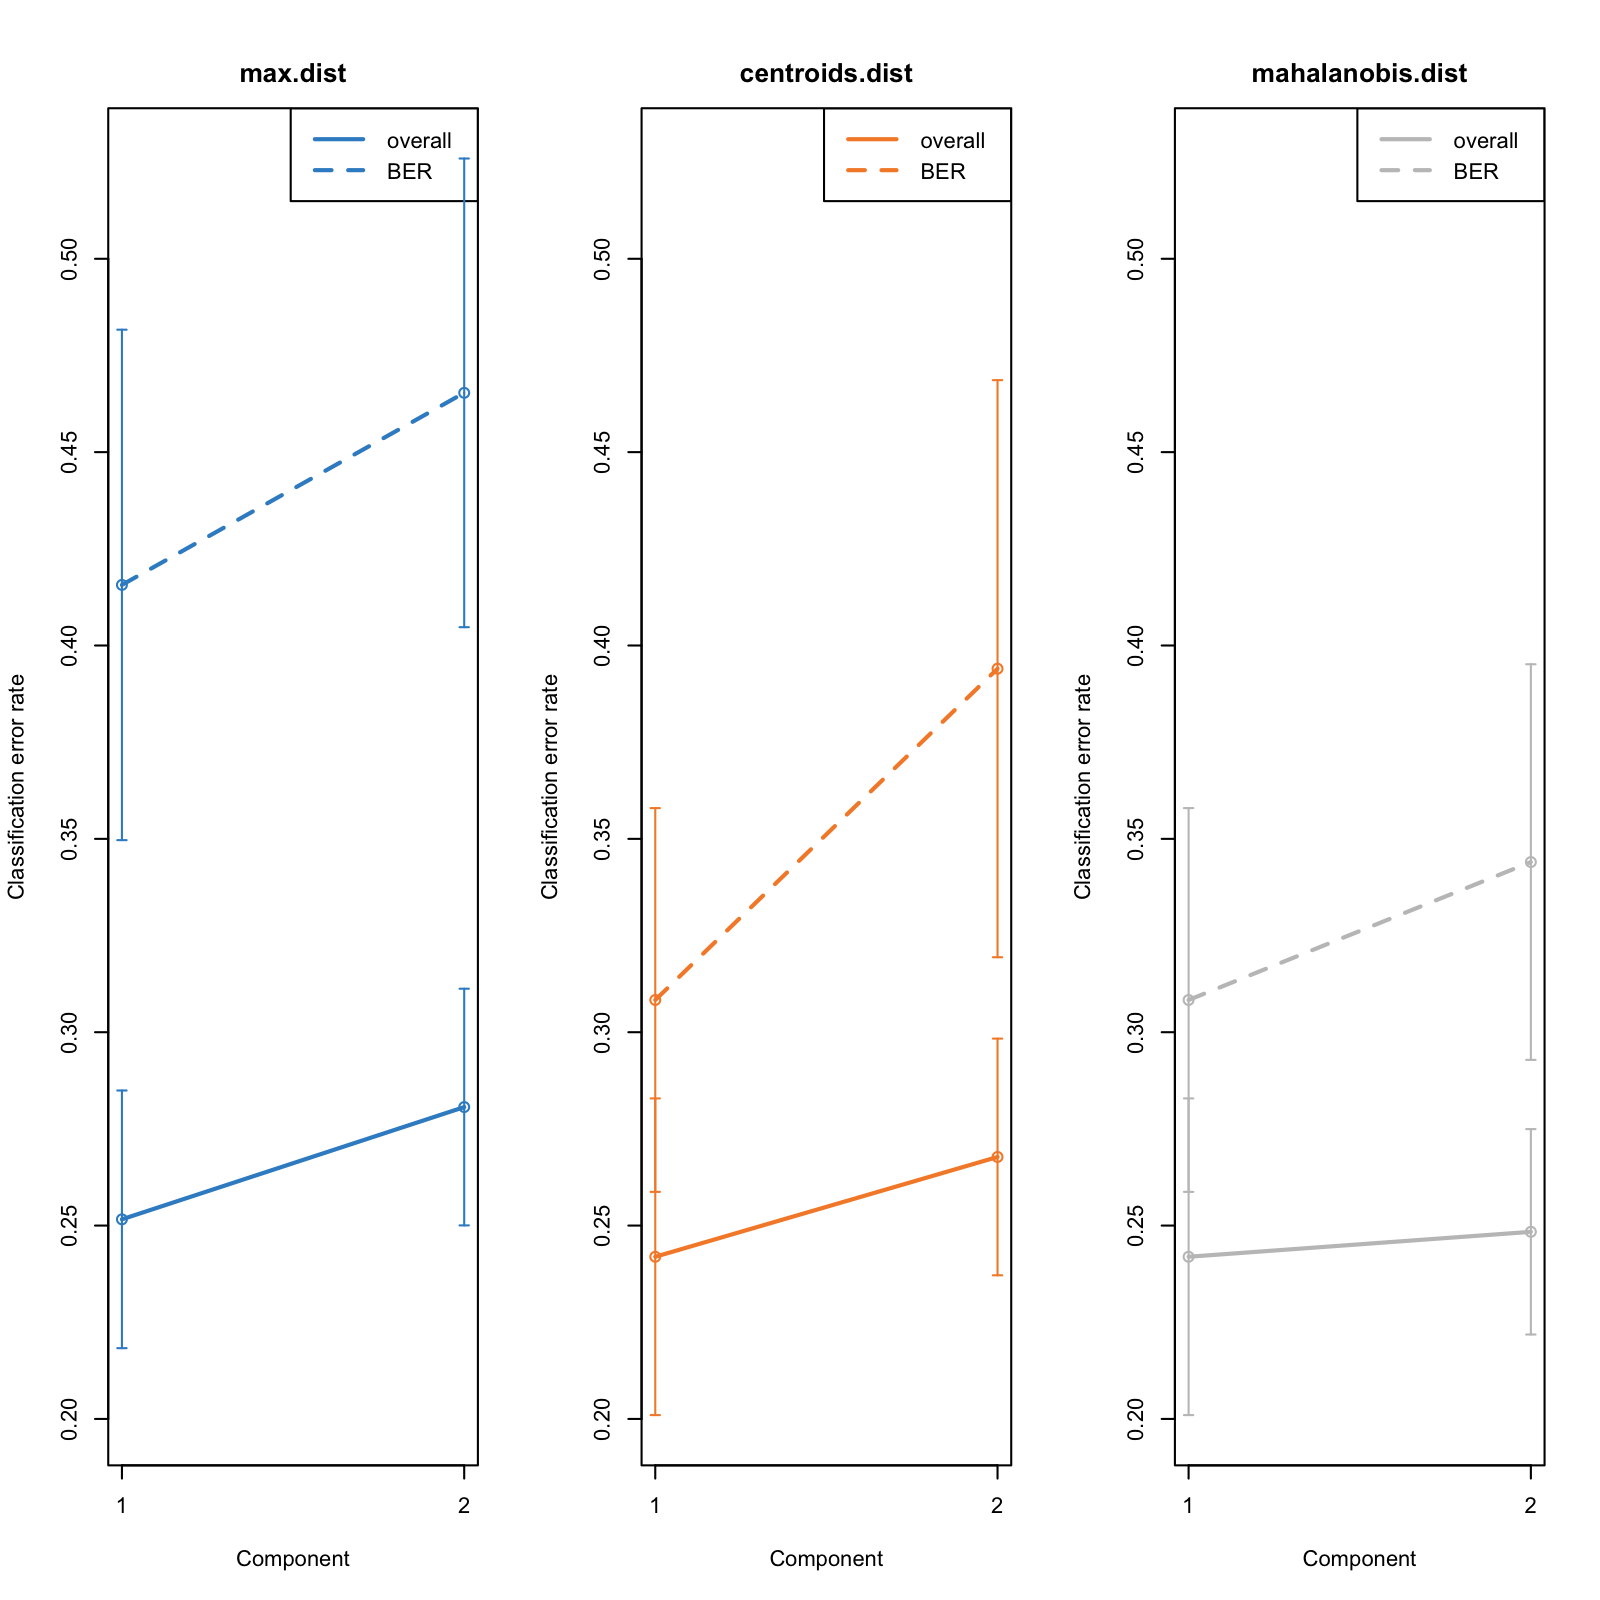

In [45]:
options(repr.plot.width=8, repr.plot.height=8, repr.plot.res=200)
plot(d.perf.plsda, overlay= 'measure', sd=T)

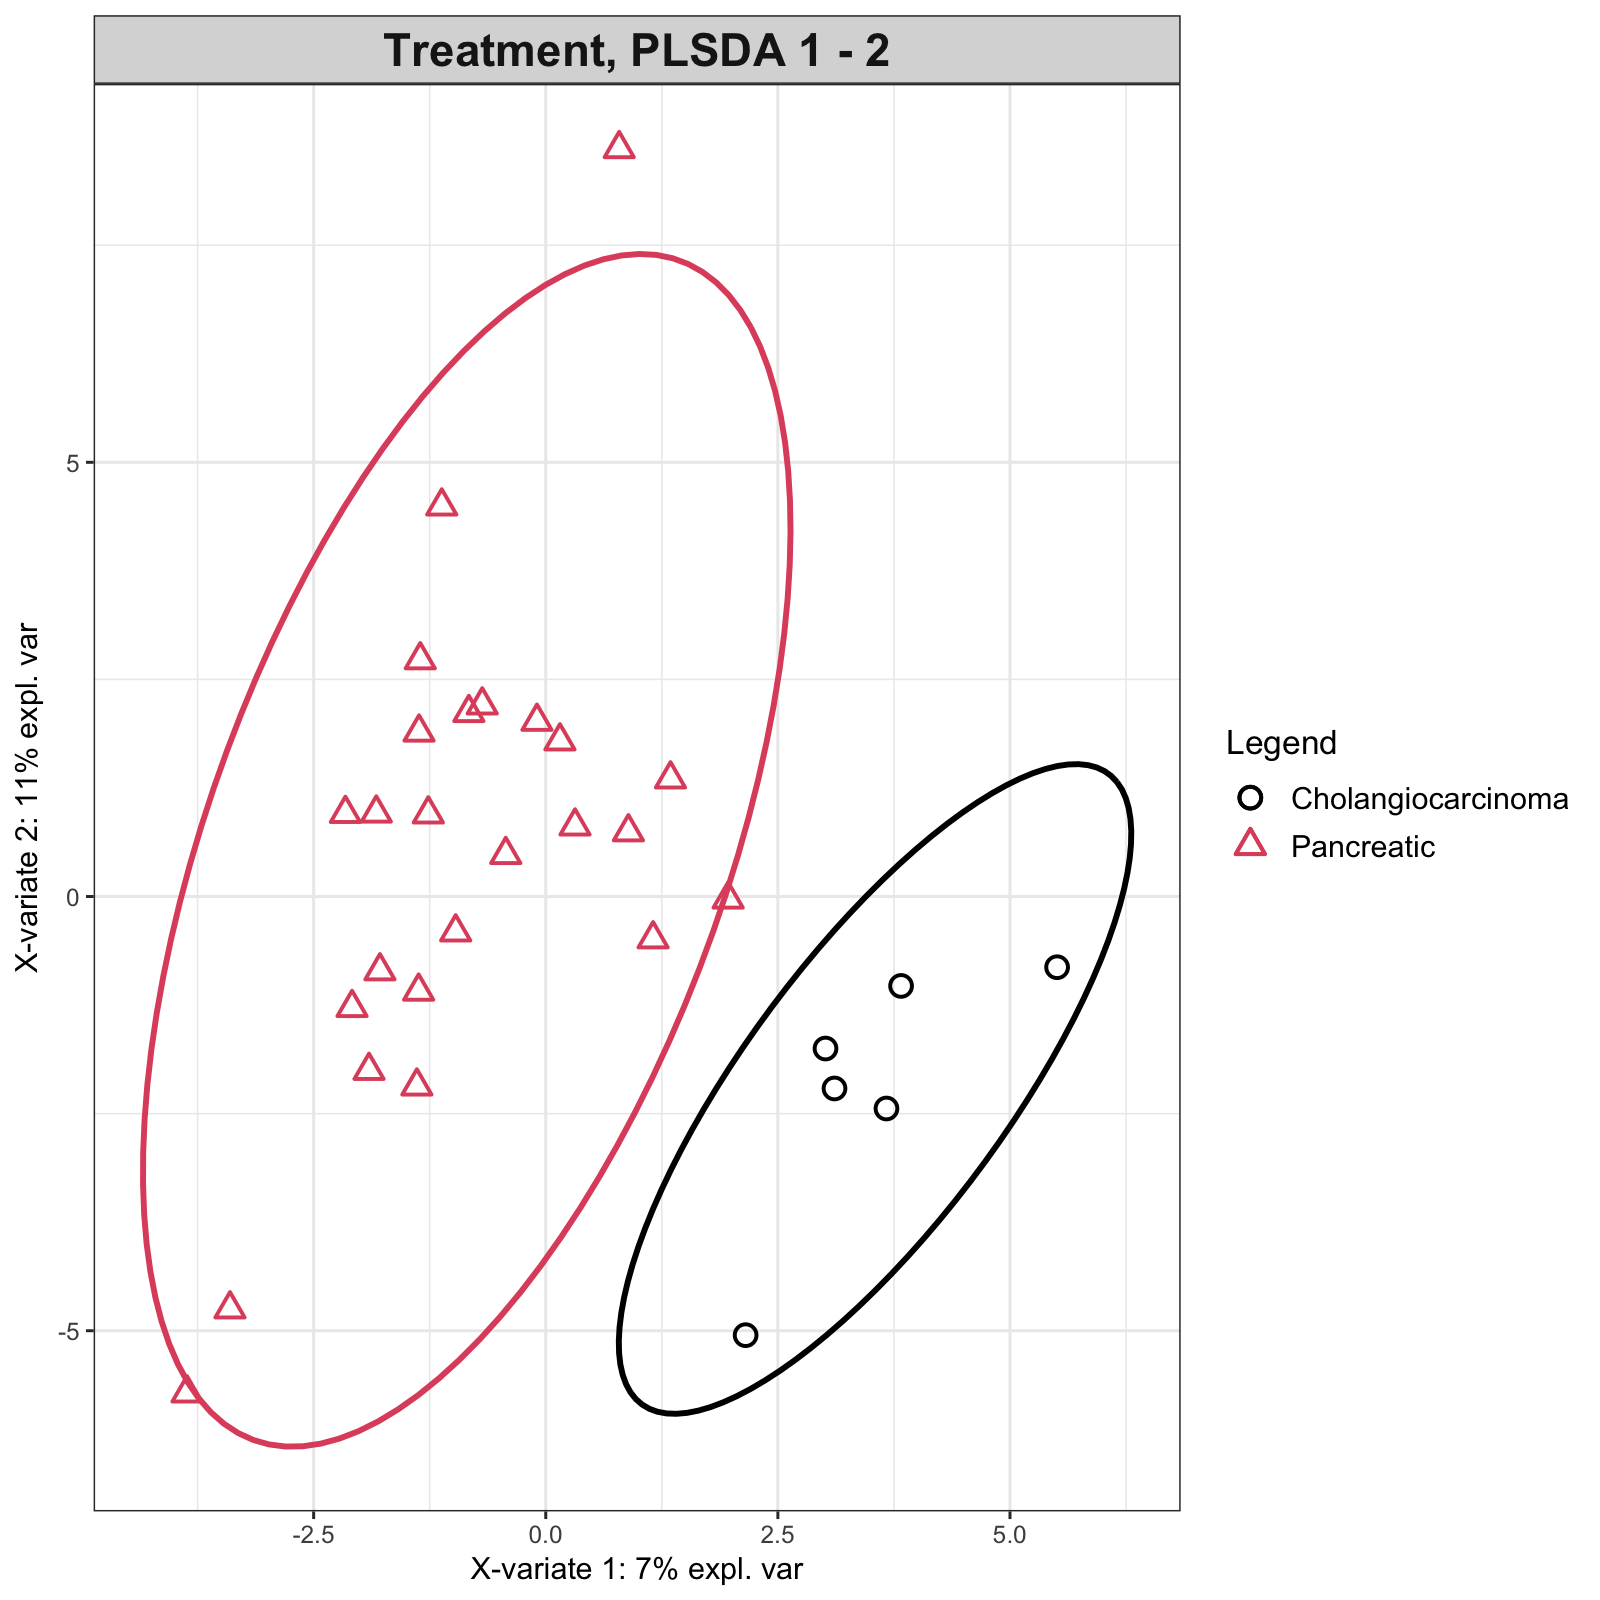

In [46]:
#First two components
options(repr.plot.width=8, repr.plot.height=8, repr.plot.res=200)
plotIndiv(d.plsda , comp = c(1,2),col=c(1:2),
          group = Y, ind.names = FALSE, 
          ellipse = TRUE, legend = TRUE, title = 'Treatment, PLSDA 1 - 2')

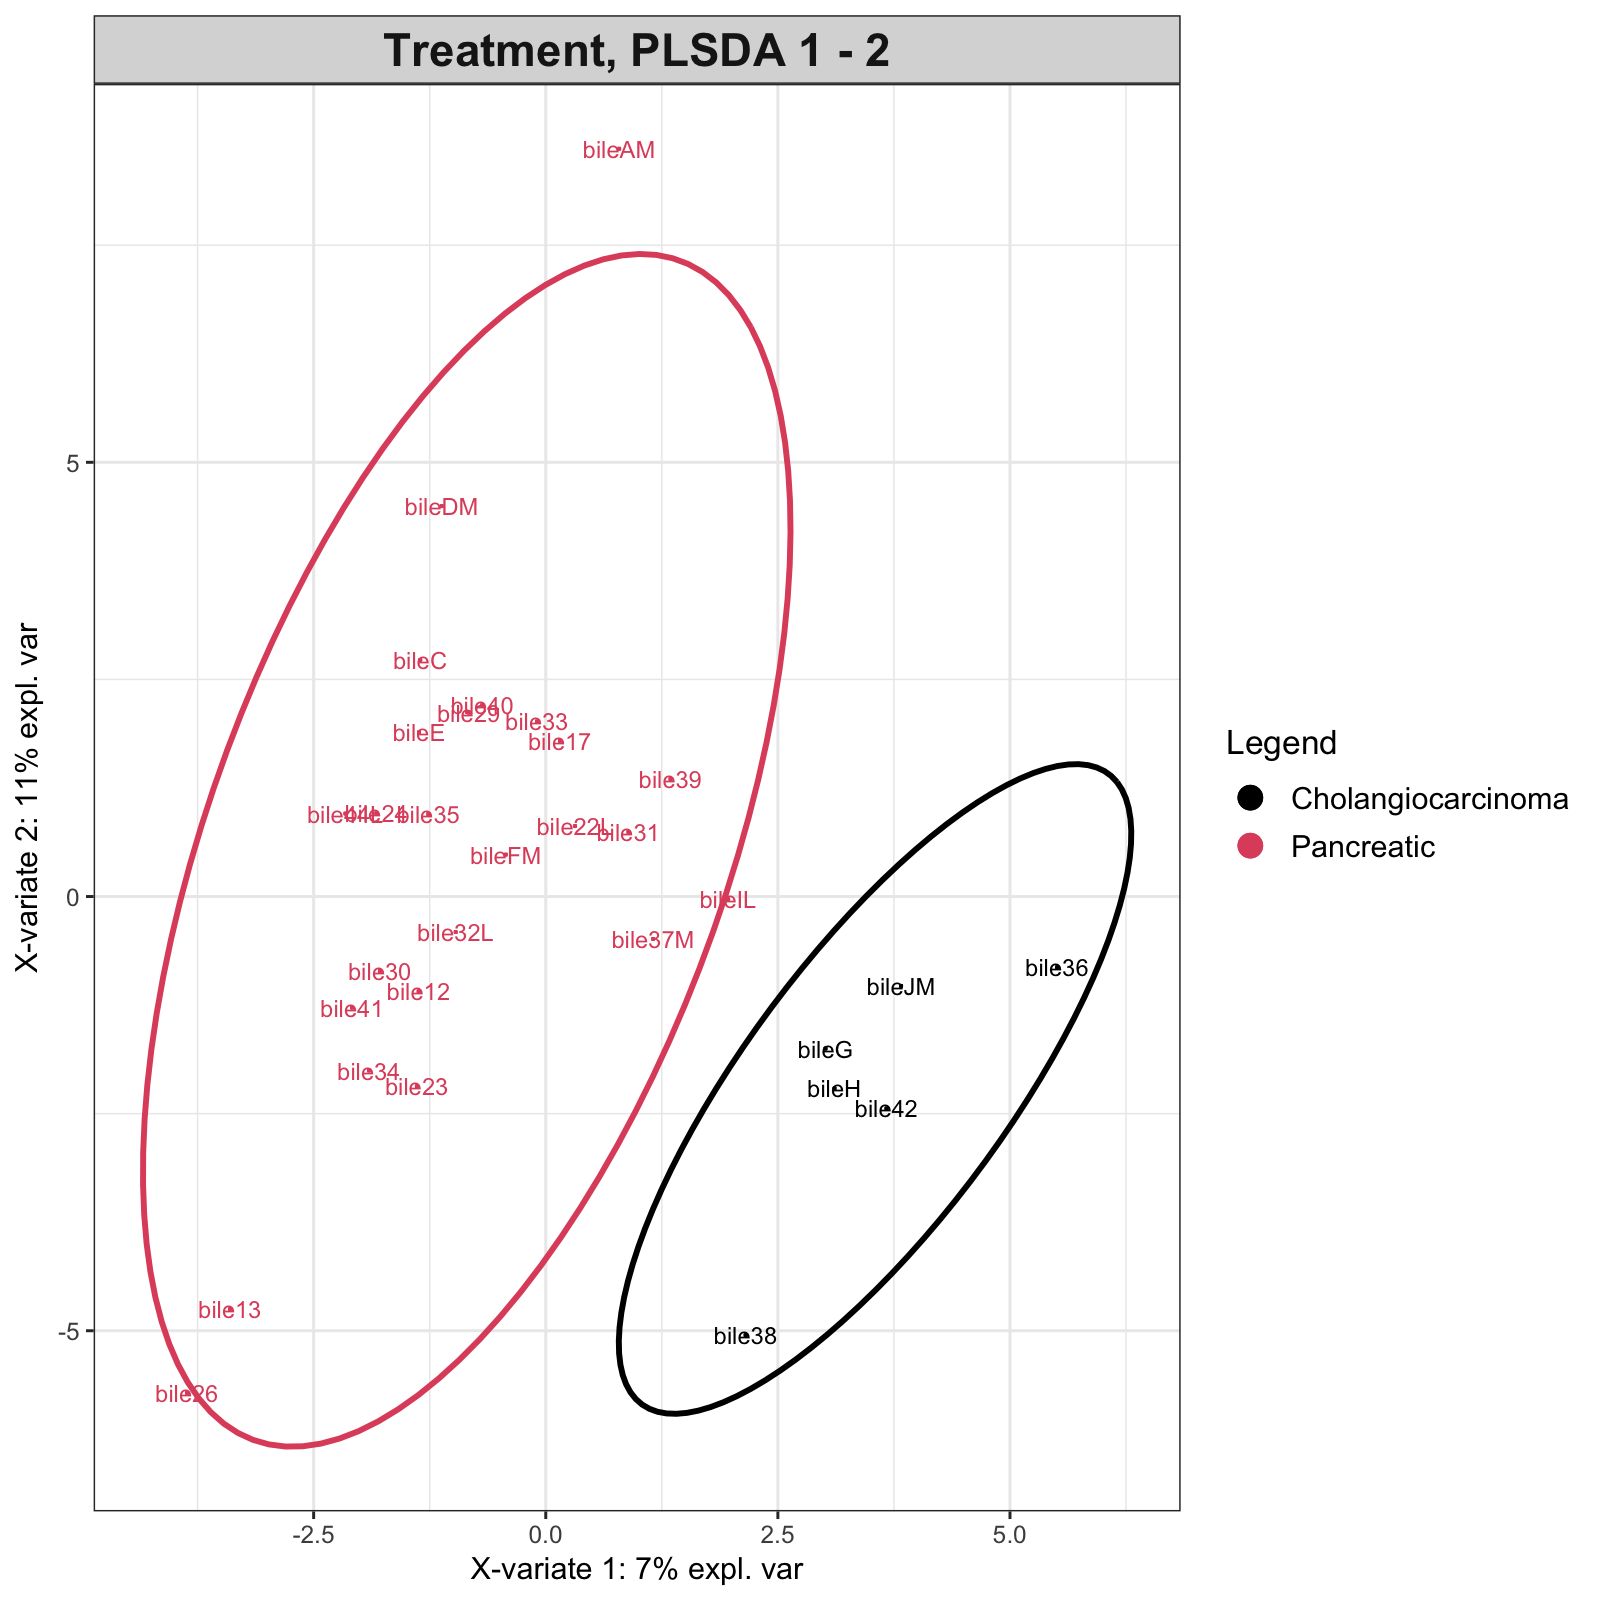

In [47]:
#First two components
plotIndiv(d.plsda , comp = c(1,2),col=c(1,2),
          group = Y, ind.names = T, 
          ellipse = TRUE, legend = TRUE, title = 'Treatment, PLSDA 1 - 2')

In [48]:
set.seed(33)  # for reproducible results for this code
d.tune.splsda = tune.splsda(data.TSS, 
                          Y = Y, 
                          ncomp = 2, 
                          multilevel = NULL, 
                          logratio = 'CLR',
                          test.keepX = c(seq(10,300, 5)), 
                          validation = c('Mfold'), 
                          folds = 10, 
                          dist = 'max.dist', # prediction distance can be chosen according to tune.plsda results
                          nrepeat = 10,
                          progressBar = T)


comp 1 
  |                                                                      |   0%

Warning message in MCVfold.spls(X, Y, multilevel = multilevel, validation = validation, :
“At least one class is not represented in one fold, which may unbalance the error rate.
  Consider a number of folds lower than the minimum in table(Y): 6”


  |======================================================================| 100%
comp 2 
  |                                                                      |   0%

Warning message in MCVfold.spls(X, Y, multilevel = multilevel, validation = validation, :
“At least one class is not represented in one fold, which may unbalance the error rate.
  Consider a number of folds lower than the minimum in table(Y): 6”


  |======================================================================| 100%


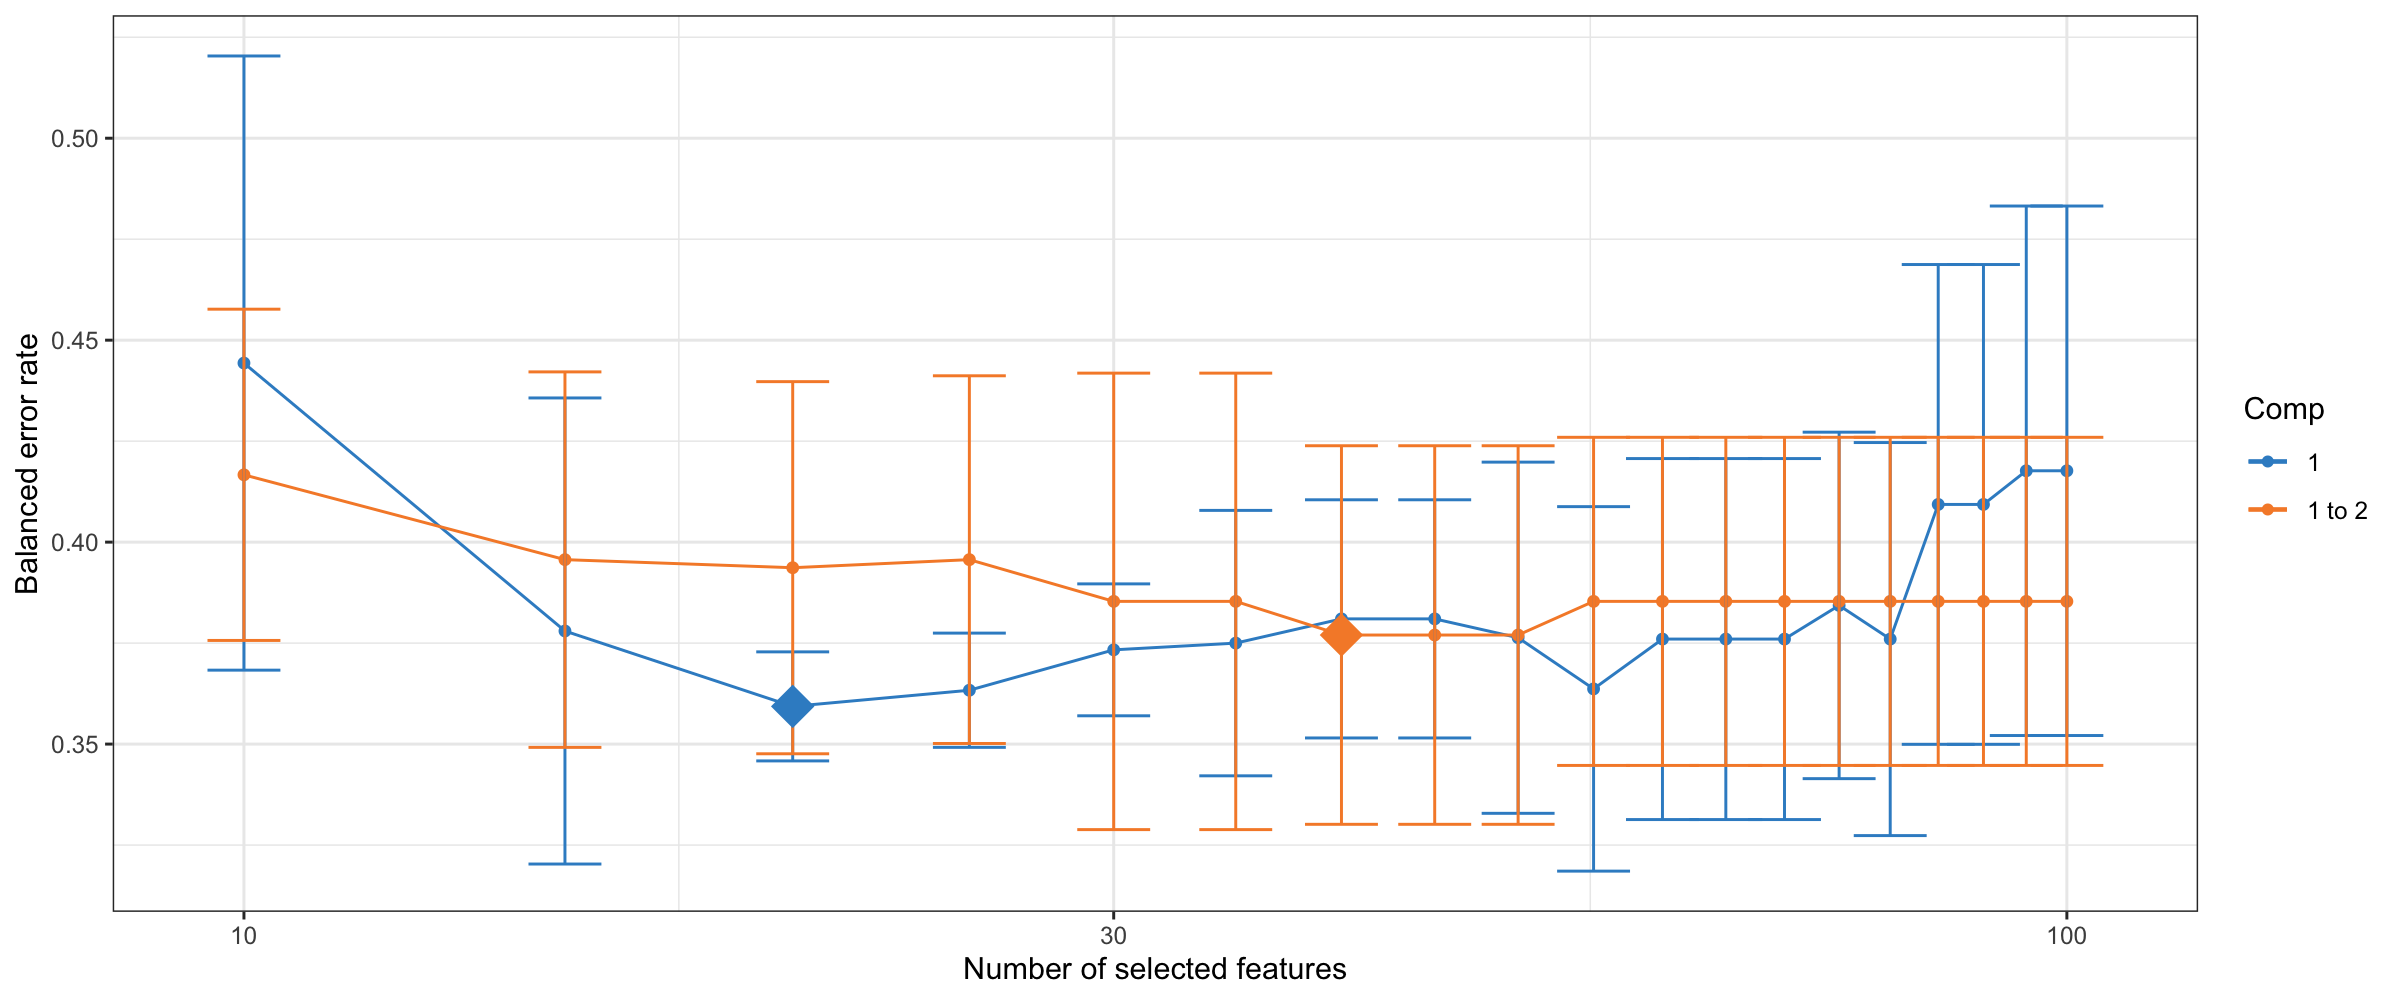

In [49]:
options(repr.plot.width=12, repr.plot.height=5)
plot(d.tune.splsda)

In [50]:
# optimal number of variables to select on 2 comps:
select.keepX = d.tune.splsda$choice.keepX[1:2]
select.keepX

comp1 comp2 
   20    40

In [51]:
data.splsda = splsda(X = data.TSS,  Y = Y, ncomp = 2, keepX = select.keepX, logratio= "CLR")

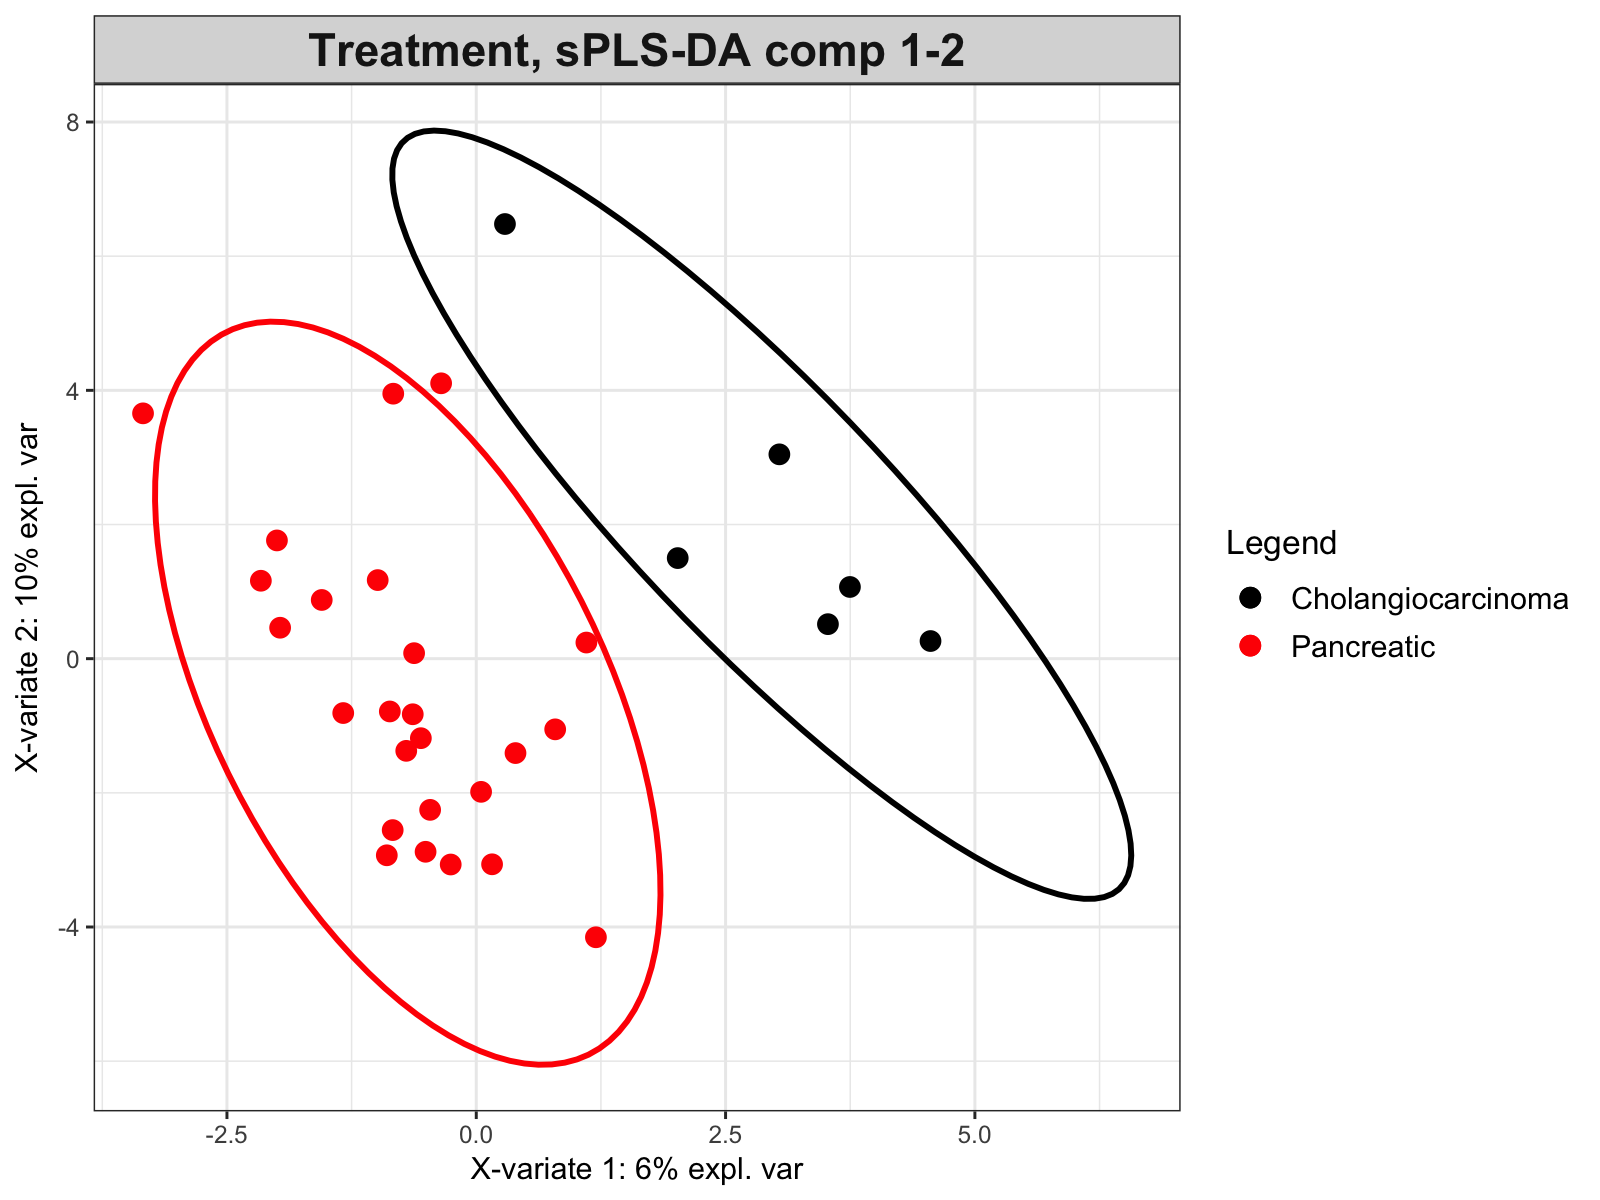

In [52]:
options(repr.plot.width=8, repr.plot.height=6)
plotIndiv(data.splsda, 
          ind.names = F, 
          #col.per.group = color.mixo(1:2),  
          col= c("black","red"), 
          comp = c(1,2),
          pch = 16, 
          ellipse = TRUE,
          legend = TRUE,
          title = 'Treatment, sPLS-DA comp 1-2')

In [54]:
options(repr.plot.width=8, repr.plot.height=6)
pdf("splsda_comp1_2_Cholangiocarcinoma_vs_Pancreatic_02.pdf")
plotIndiv(data.splsda, 
          ind.names = F, 
          #col.per.group = color.mixo(1:2),  
          col= c("black","red"), 
          comp = c(1,2),
          pch = 16, 
          ellipse = TRUE,
          legend = TRUE,
          title = 'Treatment, sPLS-DA comp 1-2')
dev.off()

pdf 
  2

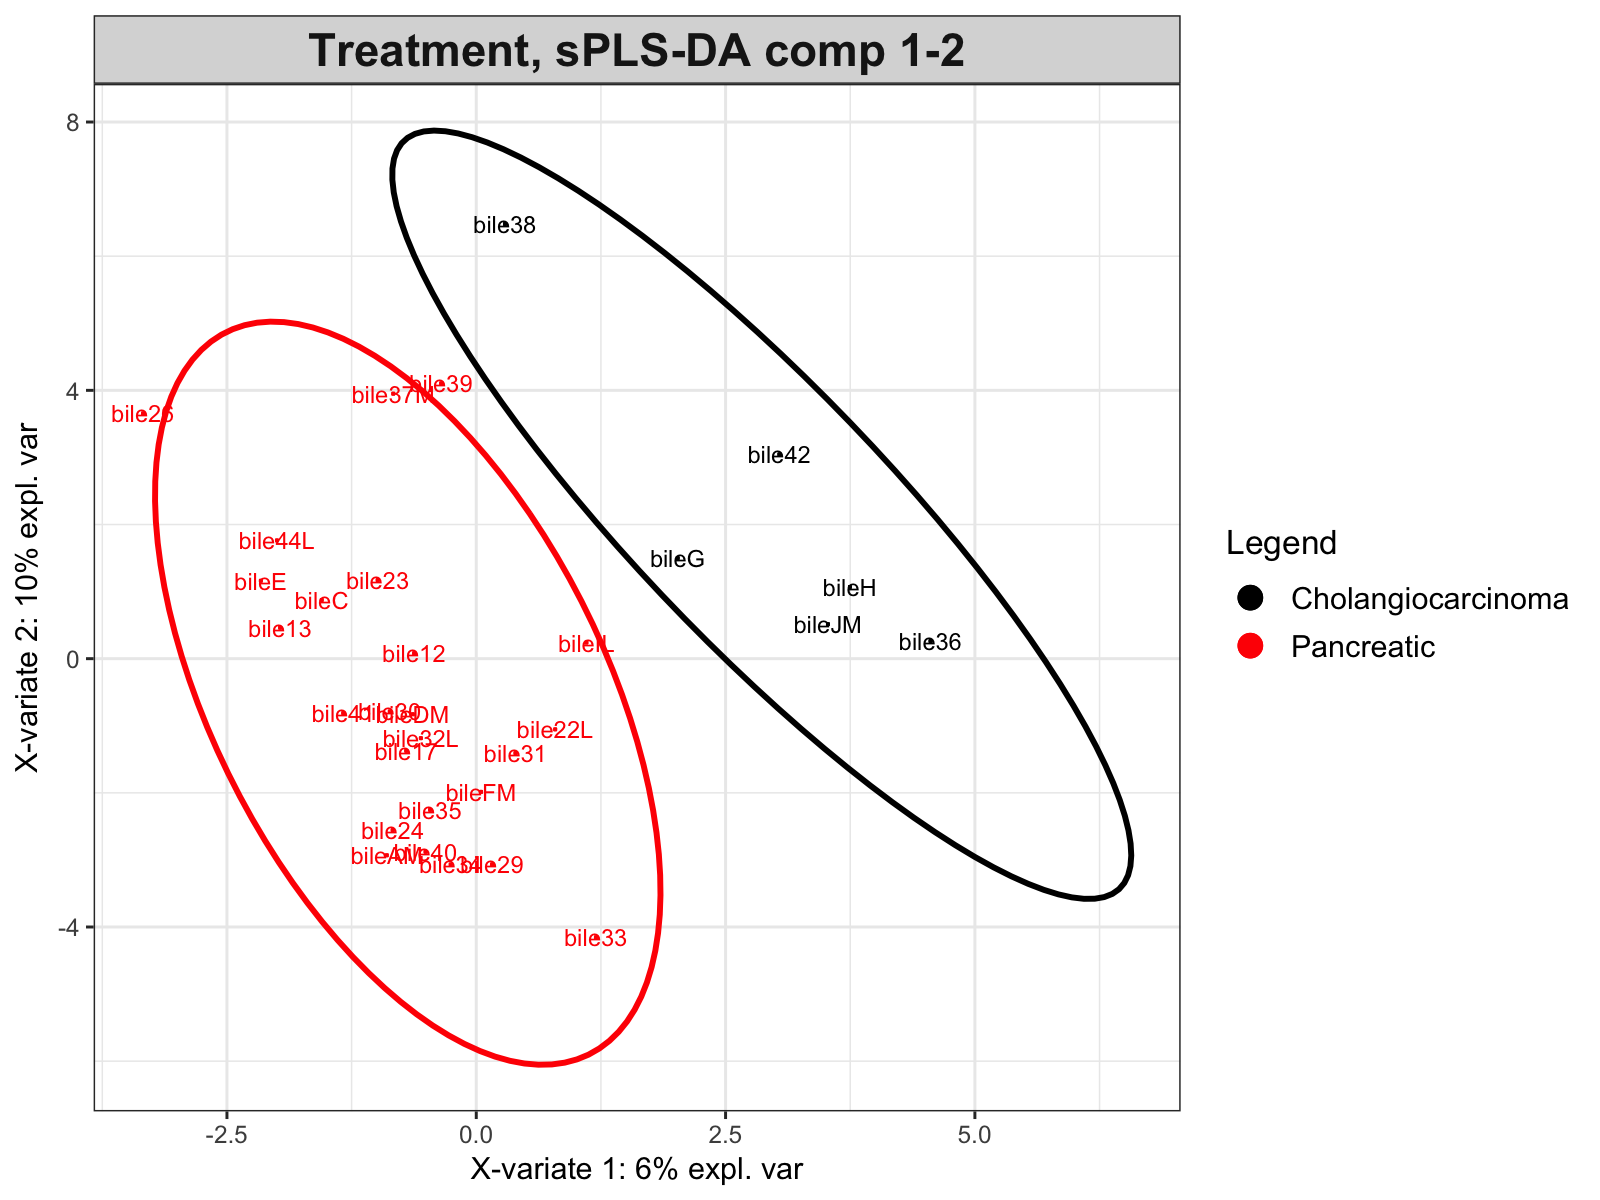

In [55]:
options(repr.plot.width=8, repr.plot.height=6)
plotIndiv(data.splsda, 
          ind.names = T, 
          # col.per.group = color.mixo(1:2), 
          col= c("black","red"), 
          comp = c(1,2),
          #pch = 16, 
          ellipse = TRUE,
          legend = TRUE,
          title = 'Treatment, sPLS-DA comp 1-2')

In [56]:
pdf("splsda_comp1_2_Cholangiocarcinoma_vs_Pancreatic_01.pdf")
plotIndiv(data.splsda, 
          ind.names = T, 
          # col.per.group = color.mixo(1:2), 
          col= c("black","red"), 
          comp = c(1,2),
          #pch = 16, 
          ellipse = TRUE,
          legend = TRUE,
          title = 'Treatment, sPLS-DA comp 1-2')
dev.off()

pdf 
  2

In [57]:
set.seed(34)  # for reproducible results for this code

data.perf.splsda = perf(data.splsda, validation = 'Mfold', folds = 10, progressBar = T, nrepeat = 10, dist = 'max.dist')


comp 1 
  |                                                                      |   0%

Warning message in MCVfold.spls(X, Y, multilevel = multilevel, validation = validation, :
“At least one class is not represented in one fold, which may unbalance the error rate.
  Consider a number of folds lower than the minimum in table(Y): 6”


  |======================================================================| 100%
comp 2 
  |                                                                      |   0%

Warning message in MCVfold.spls(X, Y, multilevel = multilevel, validation = validation, :
“At least one class is not represented in one fold, which may unbalance the error rate.
  Consider a number of folds lower than the minimum in table(Y): 6”


  |======================================================================| 100%


In [58]:
data.perf.splsda$error.rate 

$overall
       max.dist
comp1 0.1709677
comp2 0.2064516

$BER
       max.dist
comp1 0.3593333
comp2 0.3623333

In [59]:
selectVar(data.splsda, comp = 1)$value

value.var   
OTU36_Rothia                        -0.482486707
OTU76_Christensenellaceae R-7 group  0.440820107
OTU2_Akkermansia                     0.391185084
OTU25_Lautropia                      0.286336679
OTU100_Lachnoclostridium             0.238965271
OTU55_Lactobacillus                 -0.217470659
OTU54_Clostridium sensu stricto 1   -0.205589543
OTU10_Bergeyella                     0.181277436
OTU30_Acinetobacter                  0.178702998
OTU11_Barnesiella                    0.170184019
OTU4_Prevotella 7                   -0.165150865
OTU8_Alistipes                       0.130919619
OTU7_Bacteroides                     0.124108433
OTU77_Ruminococcus 2                 0.117634430
OTU29_Achromobacter                  0.095842781
OTU3_Alloprevotella                 -0.078263955
OTU41_Atopobium                     -0.062419798
OTU13_Parabacteroides               -0.061966159
OTU9_Capnocytophaga                  0.027189033
OTU19_Enterobacter                  -0.002011455

In [60]:
head(selectVar(data.splsda, comp = 2)$value) 

value.var 
OTU6_Prevotella       0.3400397
OTU61_Gemella         0.3380189
OTU19_Enterobacter   -0.2981756
OTU21_D_5__NA        -0.2844502
OTU14_Porphyromonas   0.2642801
OTU99_Stomatobaculum  0.2571573

In [61]:
selected.OTU.comp2 = selectVar(data.splsda, comp = 2)$name
# stability of OTUs selected on comp 2
data.perf.splsda$features$stable[[2]][selected.OTU.comp2]


                      OTU6_Prevotella                         OTU61_Gemella 
                                 1.00                                  1.00 
                   OTU19_Enterobacter                         OTU21_D_5__NA 
                                 0.99                                  0.98 
                  OTU14_Porphyromonas                  OTU99_Stomatobaculum 
                                 0.97                                  0.99 
                    OTU37_Actinomyces                           OTU94_Dorea 
                                 1.00                                  1.00 
                      OTU24_Neisseria                   OTU56_Streptococcus 
                                 0.99                                  0.95 
    OTU54_Clostridium sensu stricto 1                    OTU62_Enterococcus 
                                 0.98                                  0.91 
                        OTU18_D_5__NA OTU95_[Ruminococcus] gauvreauii group

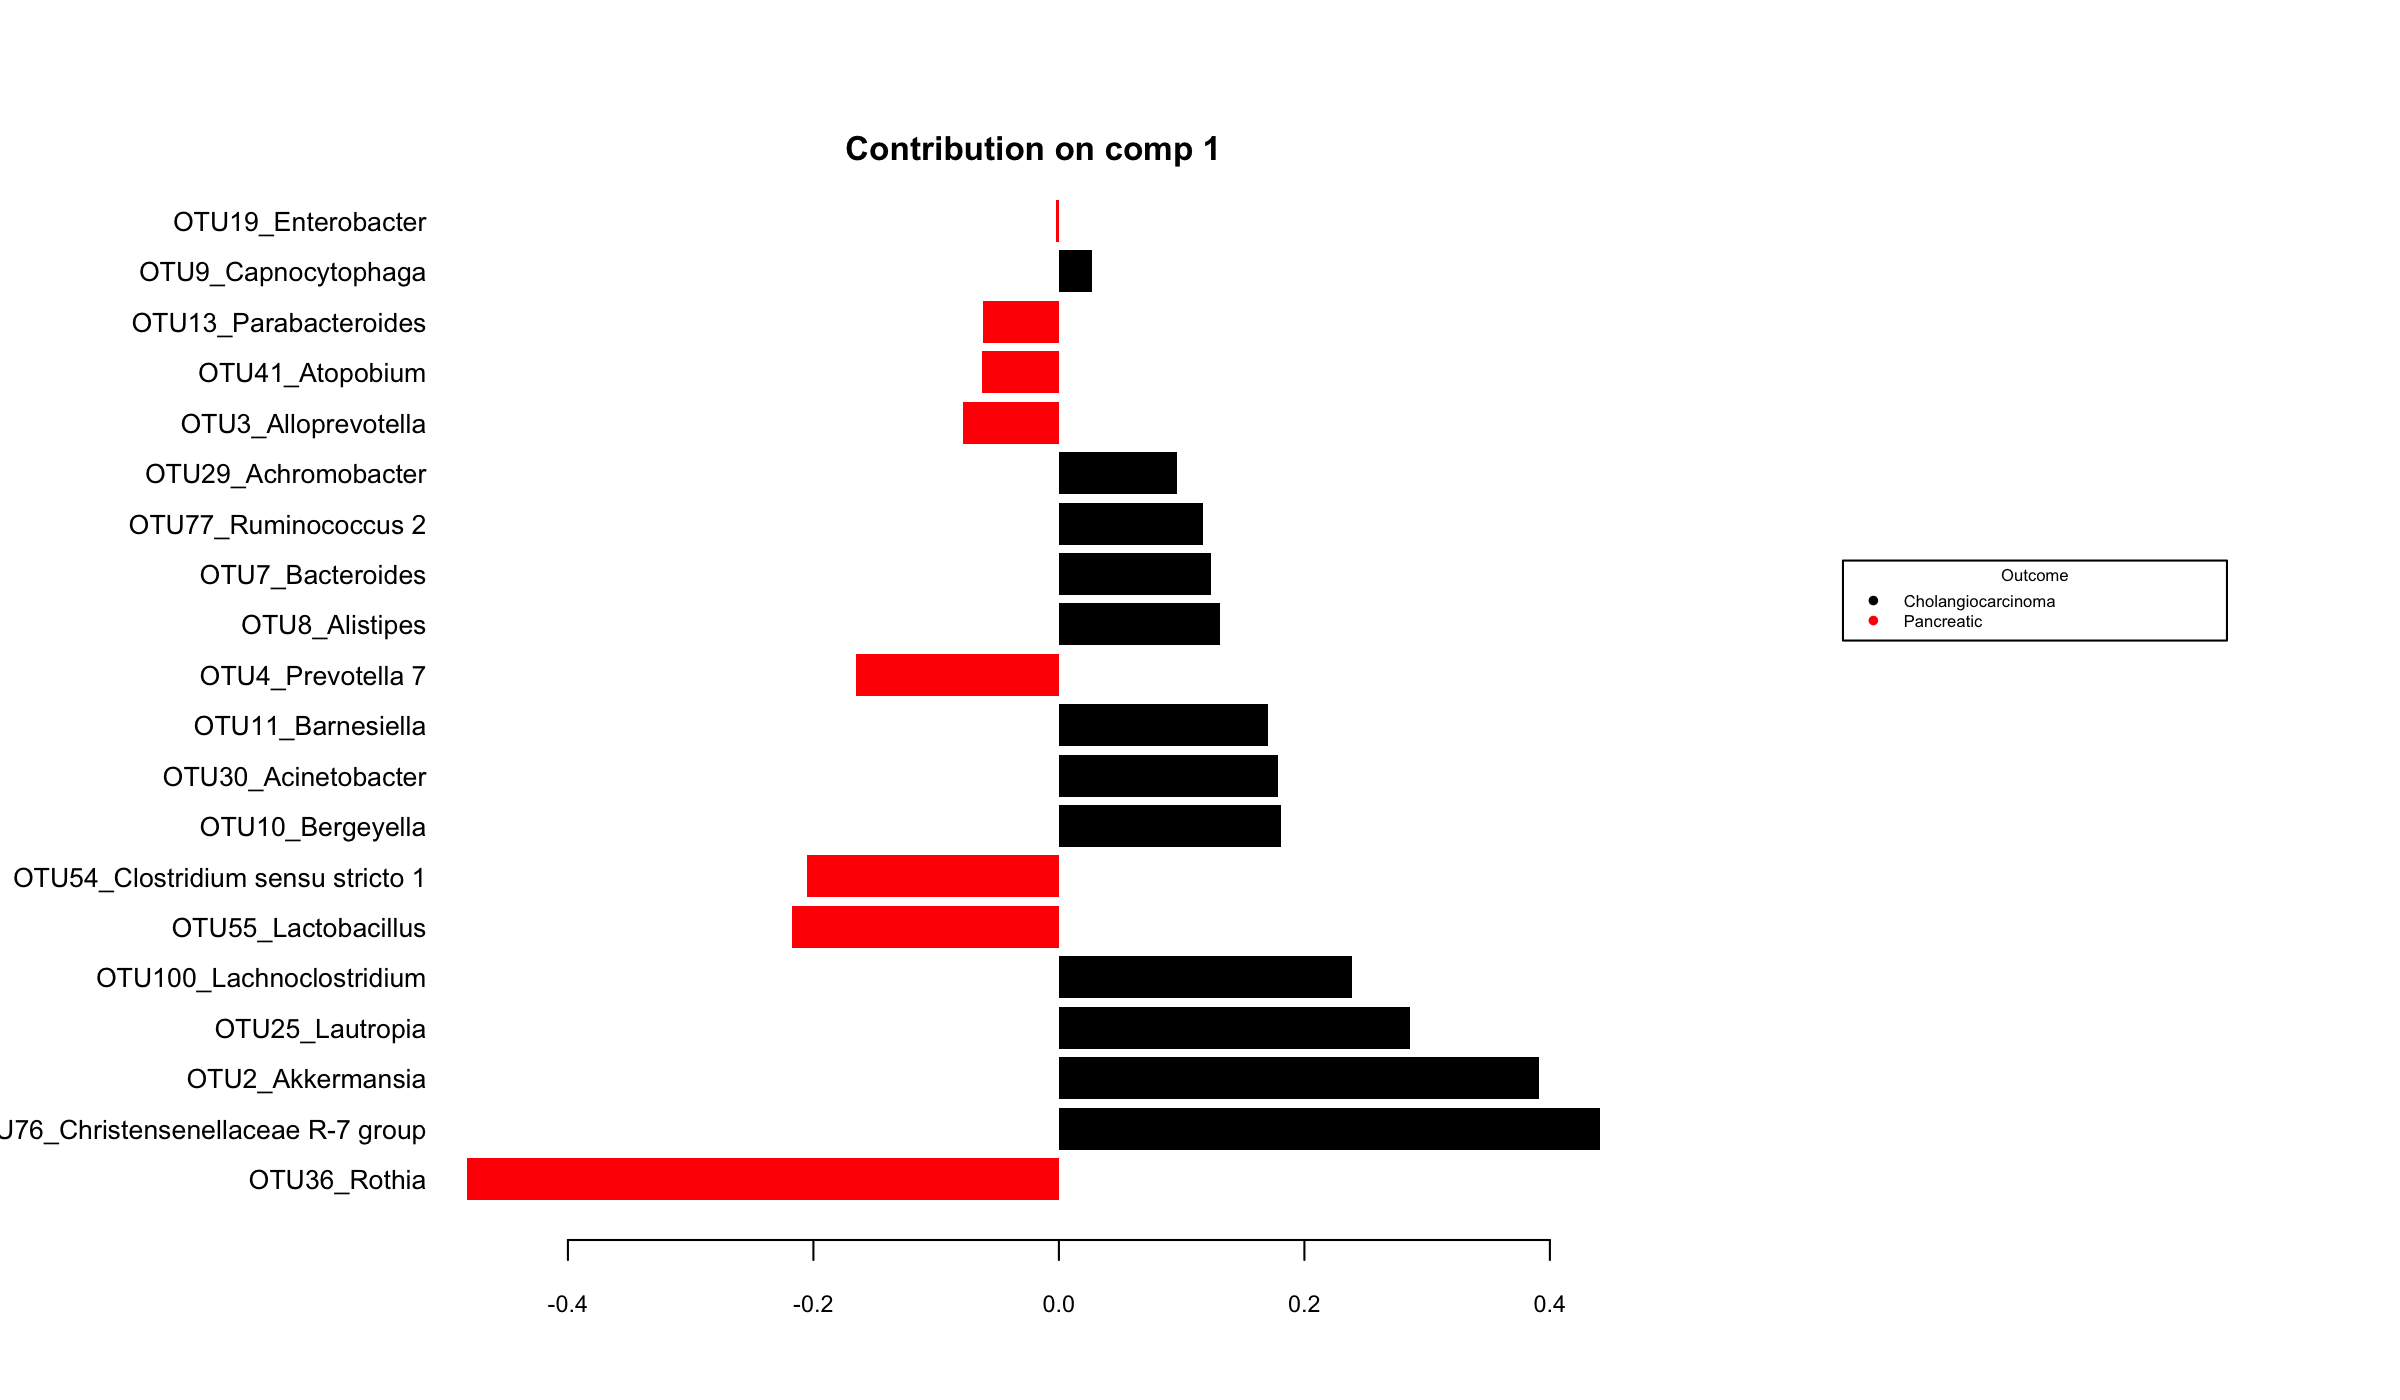

In [64]:
options(repr.plot.width = 12, repr.plot.height =7 ,repr.plot.res = 200)
plotLoadings(data.splsda, comp = 1, method = 'mean', contrib = 'max', size.title = 1,  size.name = .8, size.legend = 0.5, 
            legend.color = c("black", "red"), margin=c(20,20))

In [69]:
pdf("splsda_pc_vs_cc_comp1.pdf", width=18, height=9)
plotLoadings(data.splsda, comp = 1, method = 'mean', contrib = 'max', size.title = 1,  size.name = .8, size.legend = 0.5, 
            legend.color = c("black", "red"), margin=c(2,20))
dev.off()

pdf 
  2

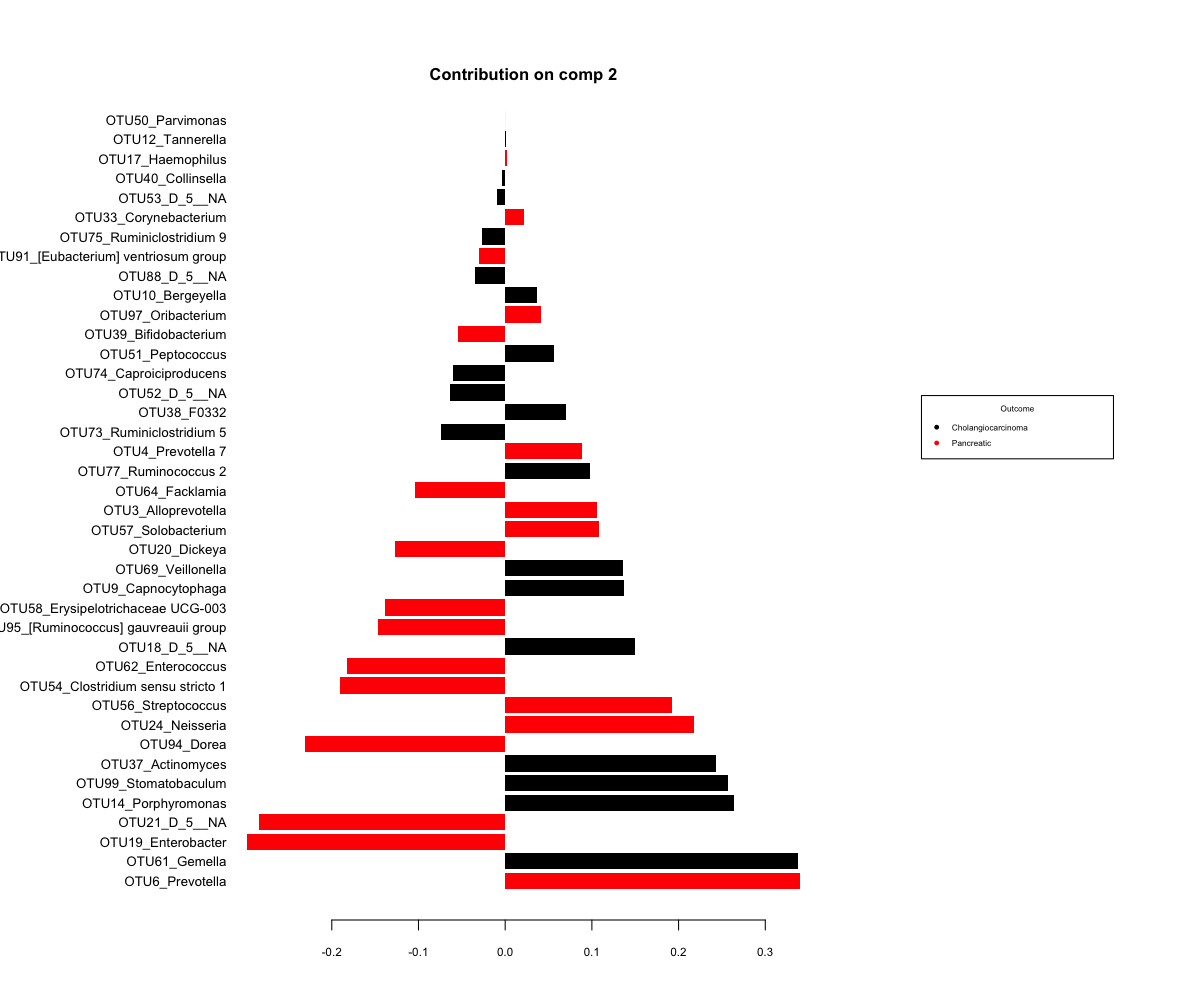

In [70]:
options(repr.plot.width = 12, repr.plot.height =10 ,repr.plot.res = 100)
plotLoadings(data.splsda, comp = 2, method = 'mean', contrib = 'max', size.title = 1, size.name = .8, size.legend = 0.5, 
             legend.color = c("black", "red"))

In [71]:
pdf("splsda_pc_vs_cc_comp2.pdf", width=12, height=9)
plotLoadings(data.splsda, comp = 2, method = 'mean', contrib = 'max', size.title = 1, size.name = .8, size.legend = 0.5, 
             legend.color = c("black", "red"))
dev.off()

pdf 
  2

In [72]:
# data.splsda$loadings$X[,c("comp1","comp2")] %>% as.data.frame %>% ggplot(aes(comp1, comp2)) + geom_point()

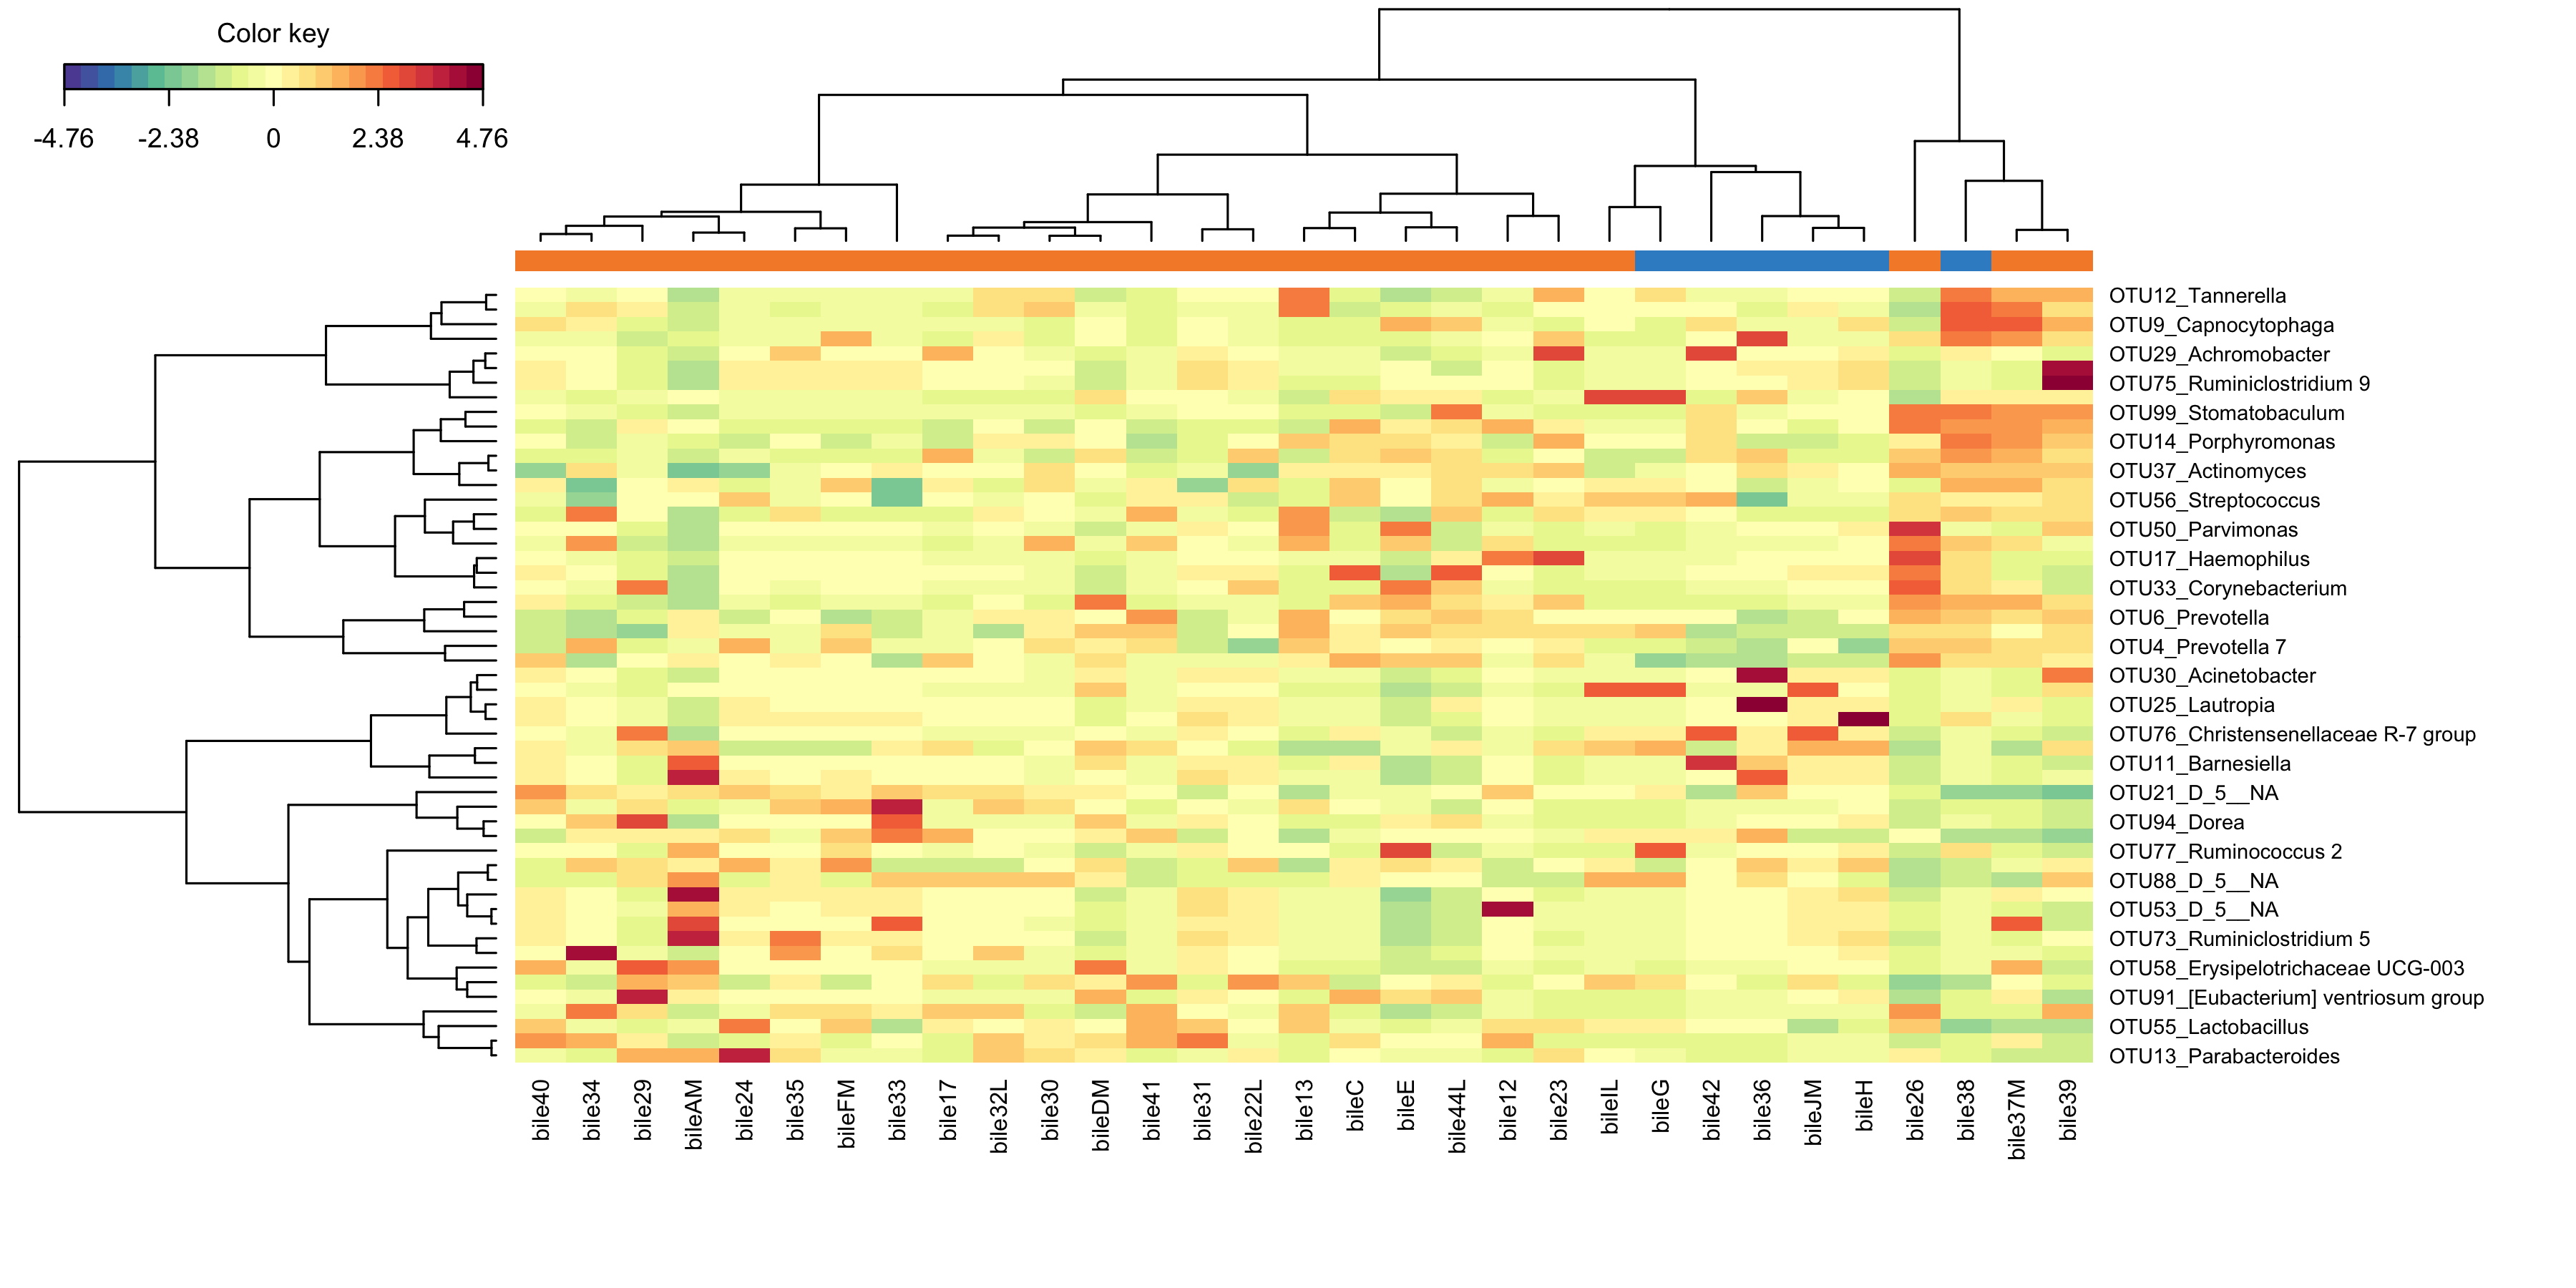

In [73]:
options(repr.plot.width = 12, repr.plot.height =6 ,repr.plot.res = 300)
cim(data.splsda, row.sideColors = color.mixo(Y), transpose = T, cluster = "both", col.names = T, margins = c(7,15))

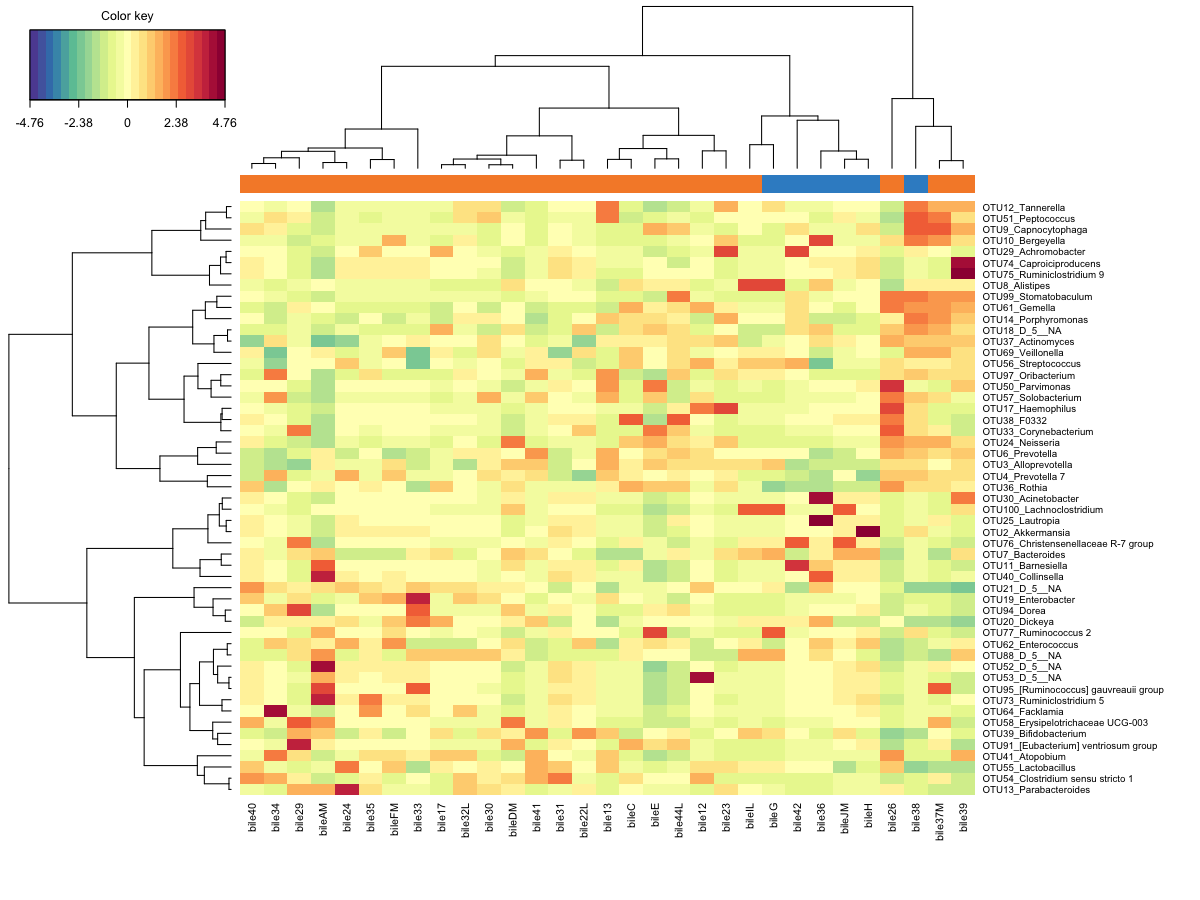

In [74]:
options(repr.plot.width = 12, repr.plot.height =9 ,repr.plot.res = 100)
cim(data.splsda, row.sideColors = color.mixo(Y), transpose = T, cluster = "both", margins = c(7,15))

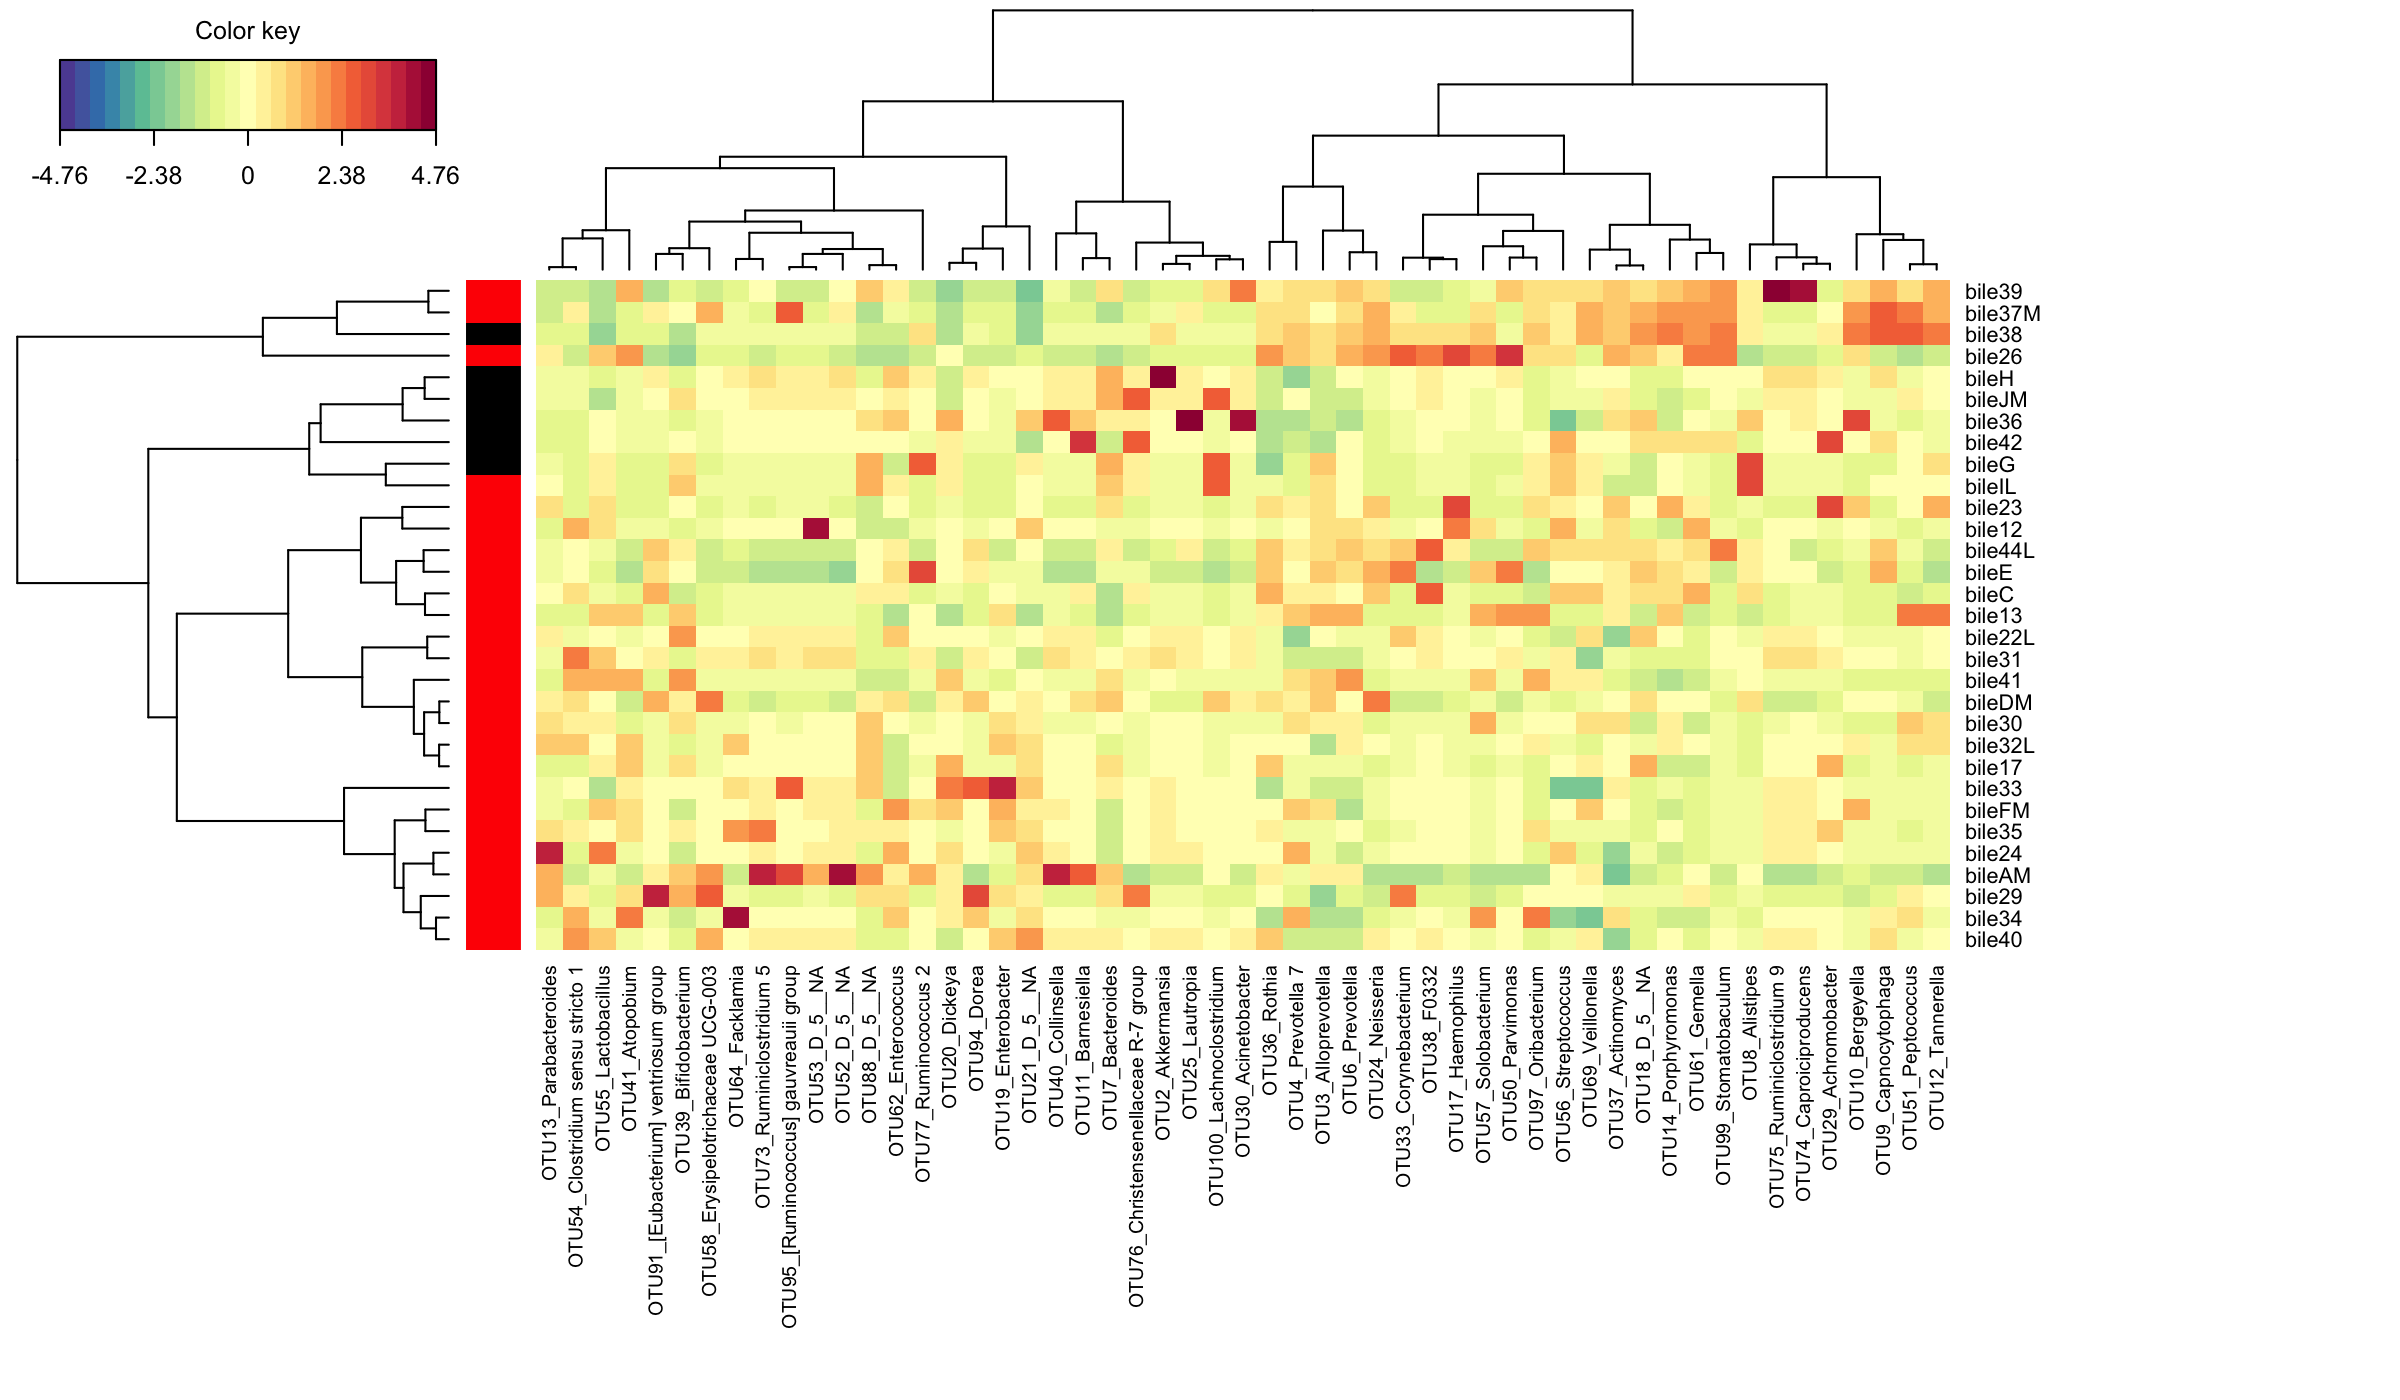

In [78]:
options(repr.plot.width = 12, repr.plot.height =7 ,repr.plot.res = 200)
cim(data.splsda,  transpose = F, cluster = "both", margins = c(15,15),
    row.sideColors  = ifelse( color.mixo(Y) == "#F68B33" , "red", "black" ))

In [80]:
library(ggpubr)
library(reshape2)

In [83]:
plot_abundance = function(data.TSS, Y, taxa_name){
    my_comp = c("Case","Control")
    taxa_name_short = sapply(strsplit(taxa_name, "_" , fixed = T),"[[", 2)
    tx = data.TSS %>% as.data.frame %>% dplyr::select(taxa_name)
    tx["group"] = Y
    options(repr.plot.width=4, repr.plot.height=5)
    p = tx %>% melt(id.vars = "group") %>%
        ggstripchart( jitter = 0.05, x = "group", y = "value",color="group", palette = c("black", "red"), add = c( "boxplot"), ylab = taxa_name_short ) +
        xlab("") +
        rotate_x_text(45) + theme(legend.position = "none") + yscale("log2", .format = TRUE) + 
        stat_compare_means(label.y = 0.03,method = "kruskal.test")
    return(p)
}

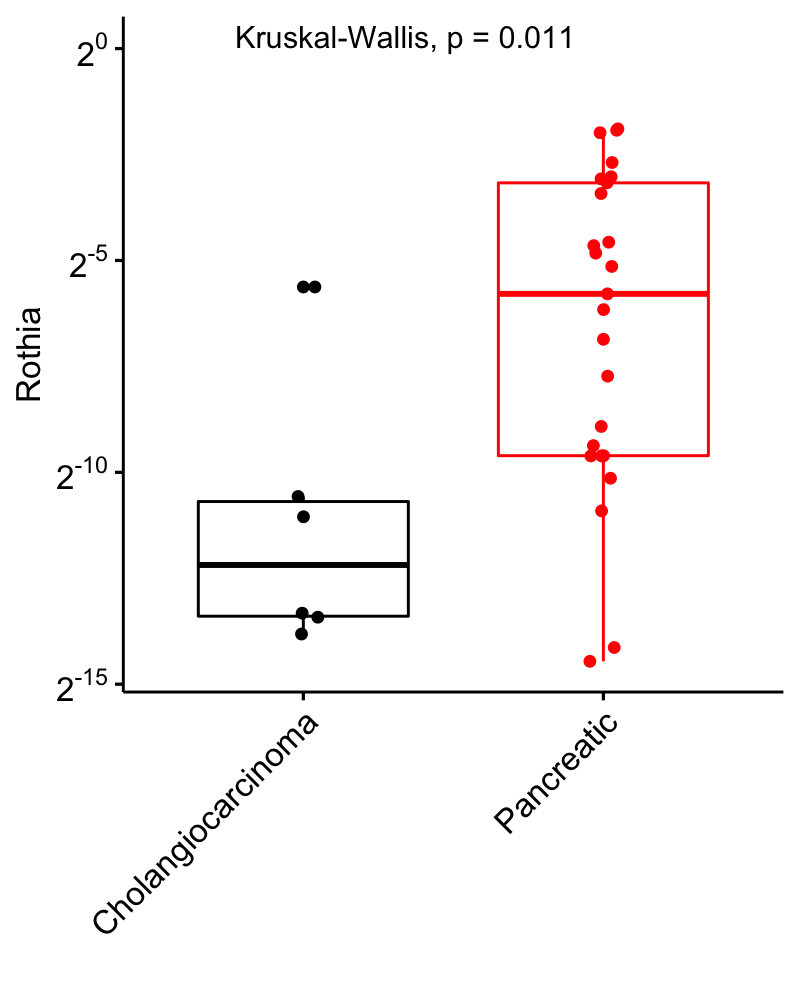

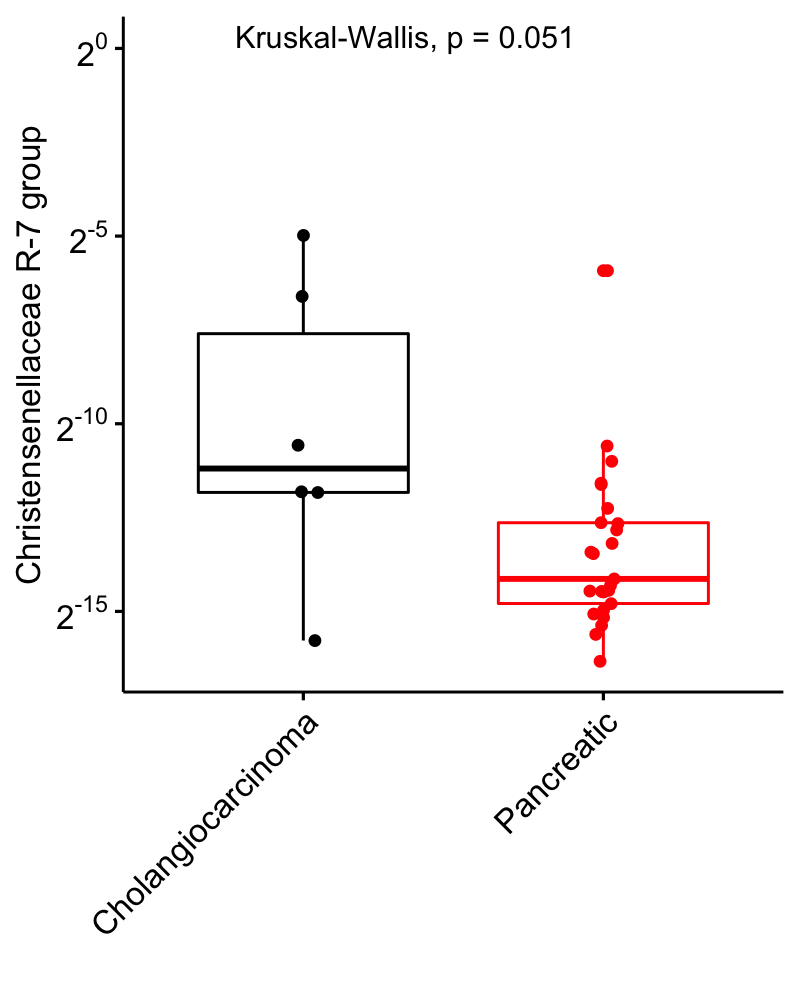

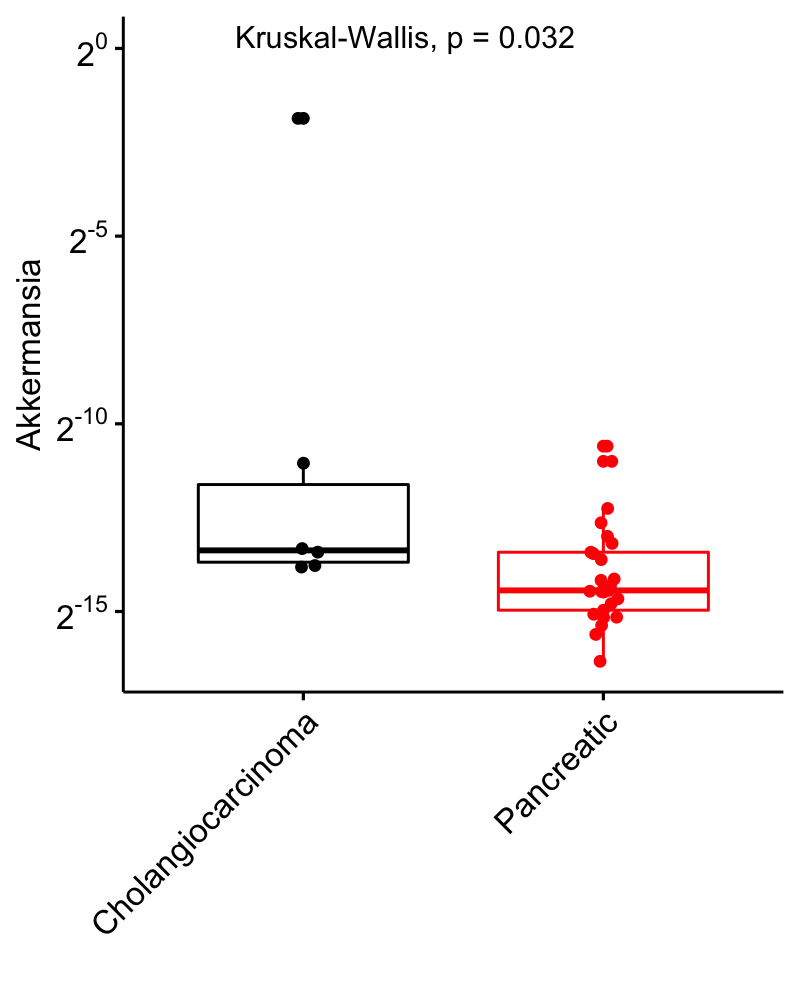

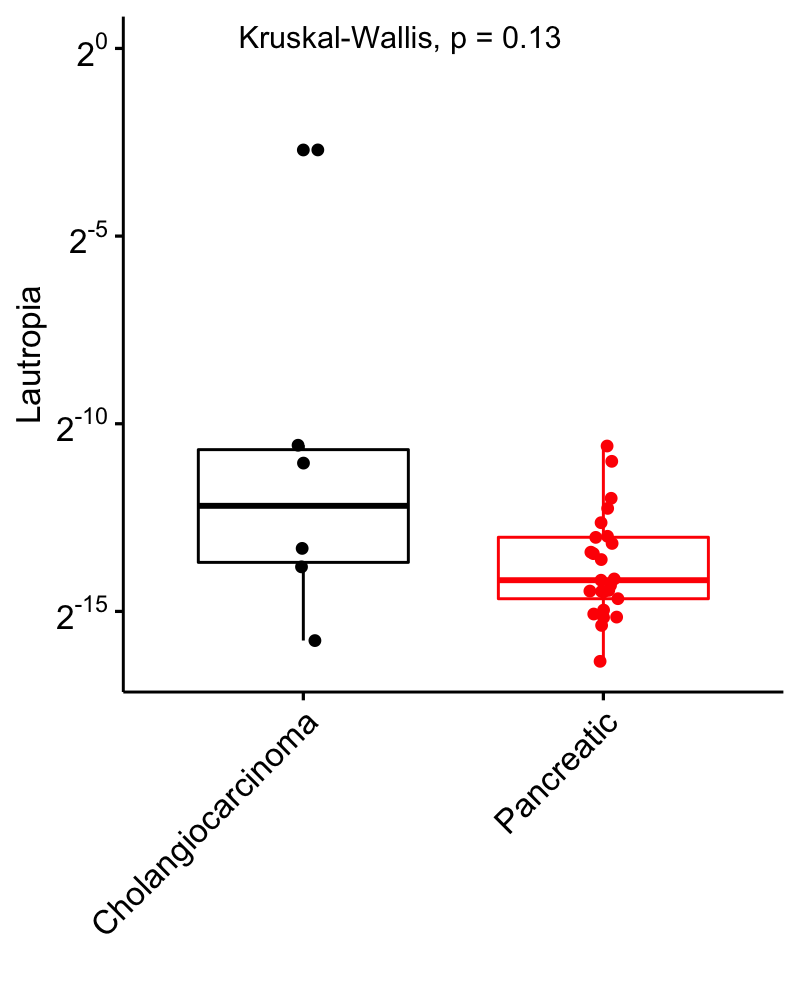

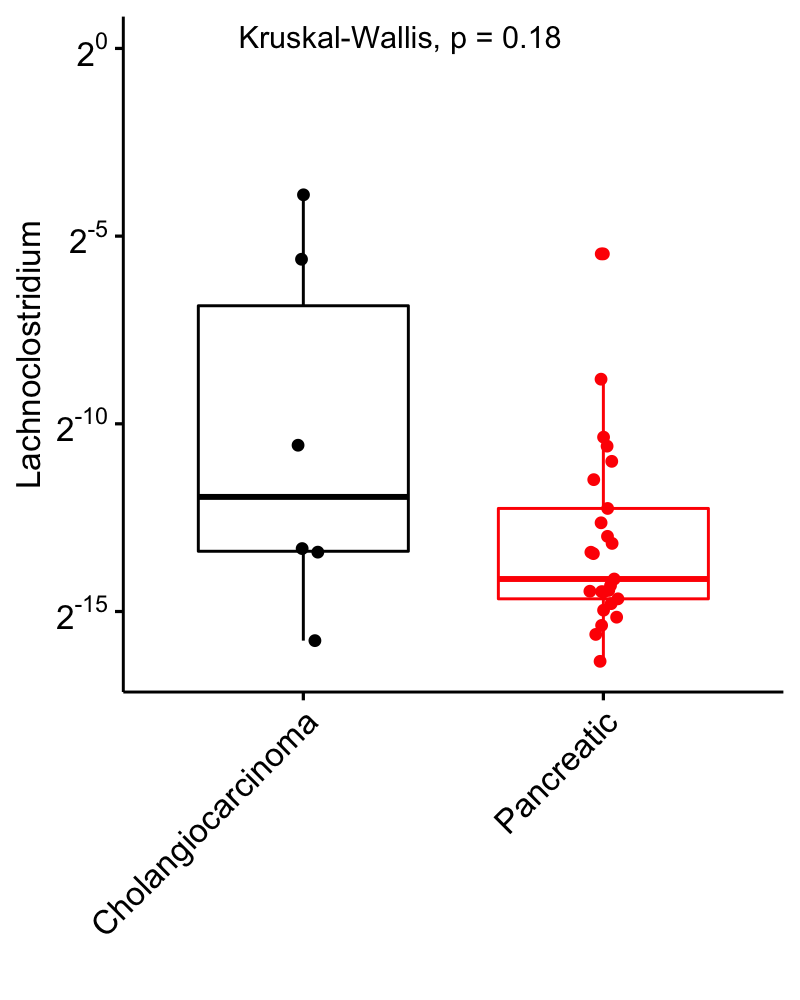

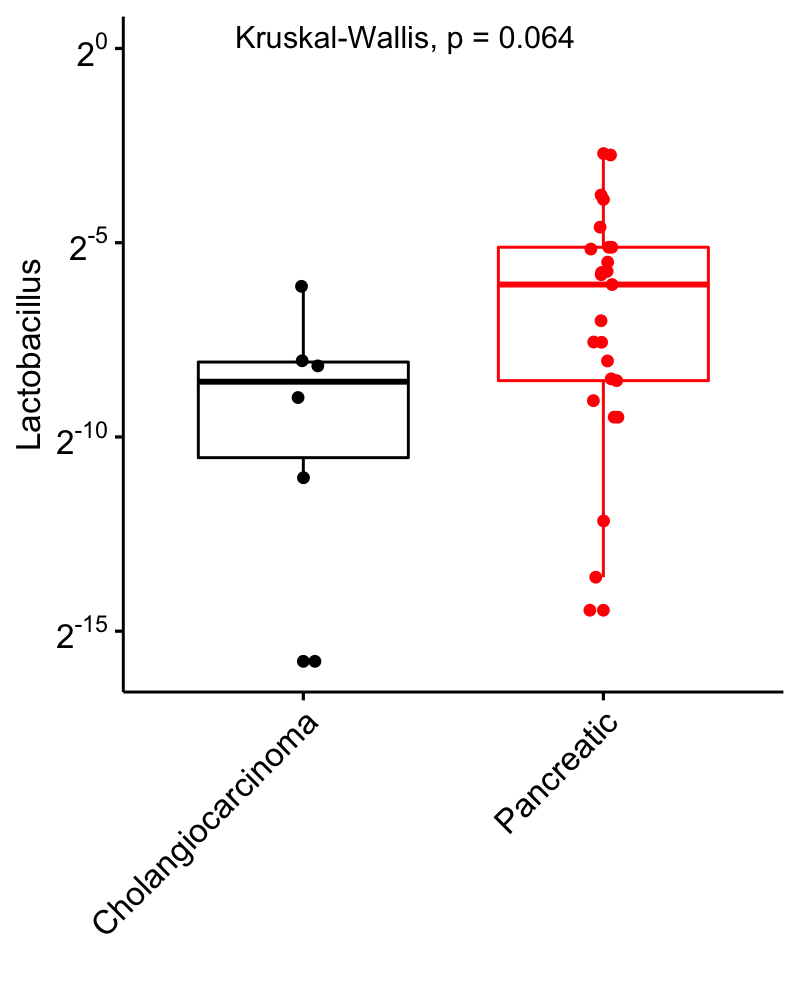

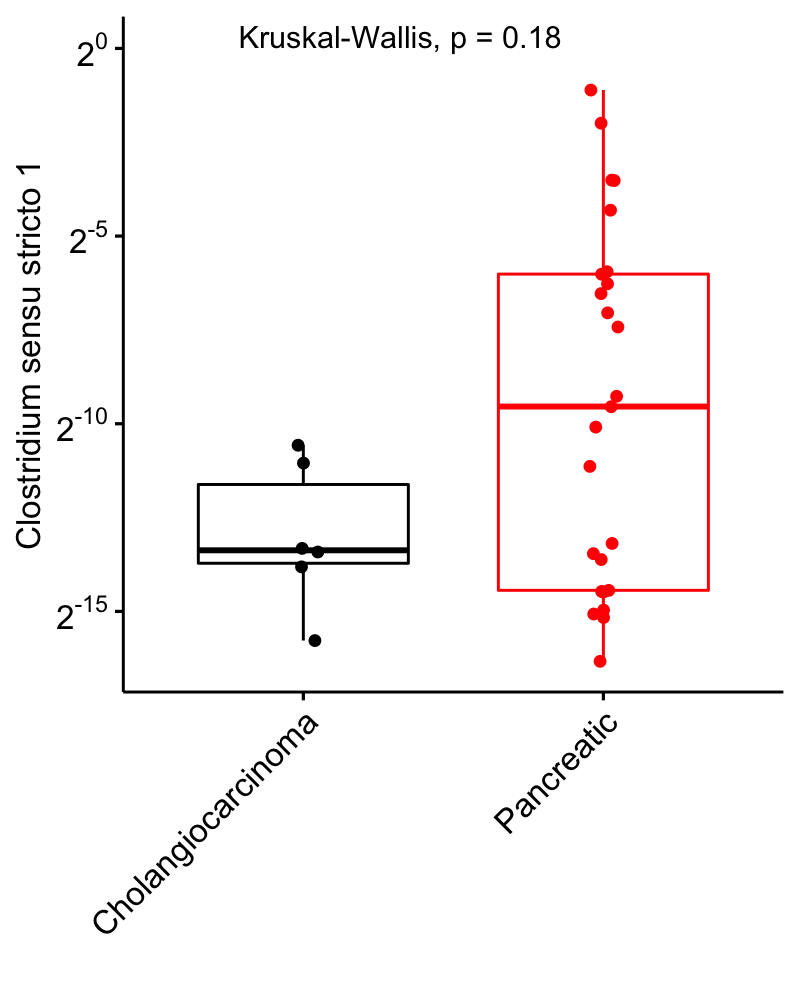

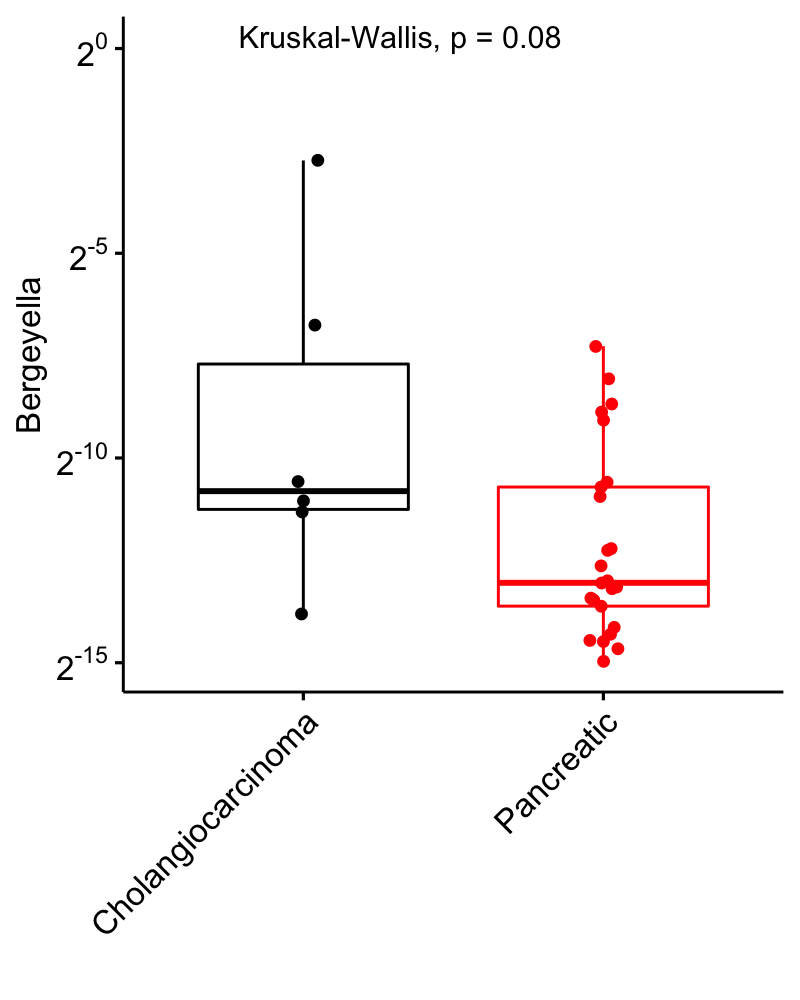

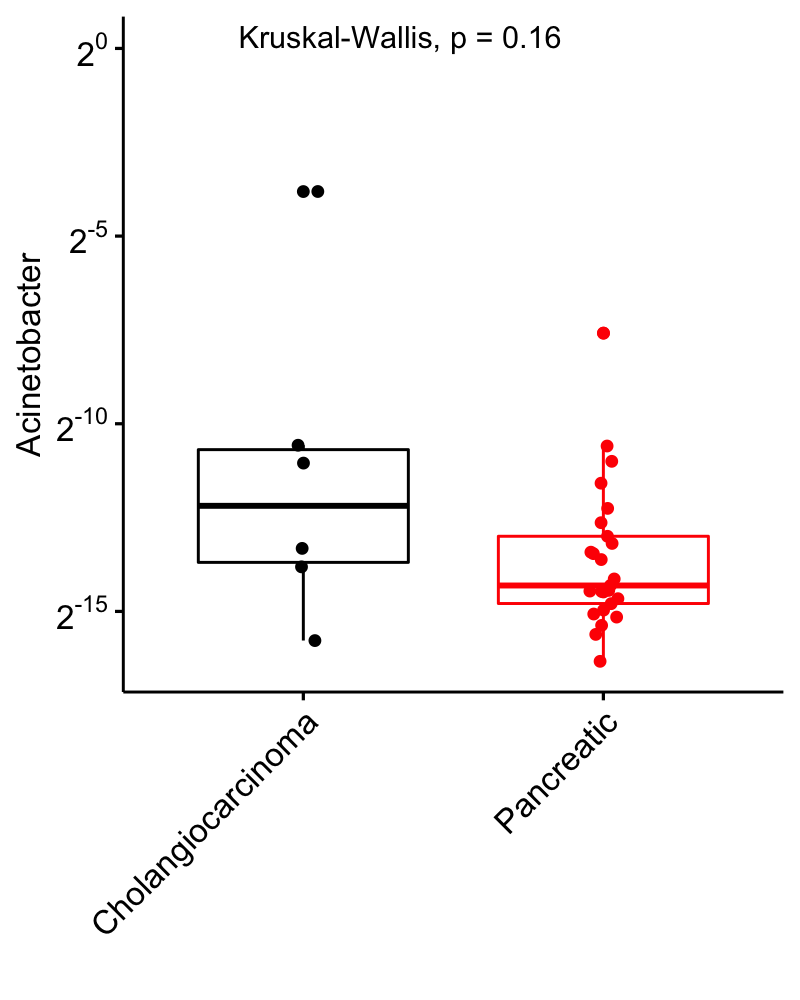

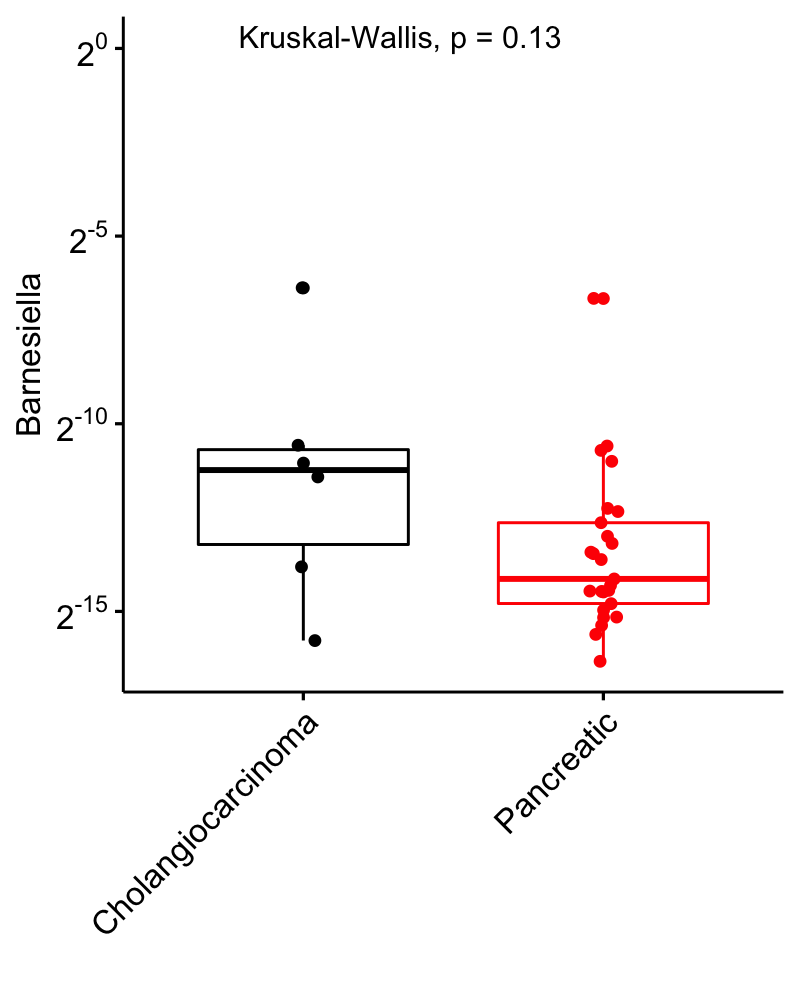

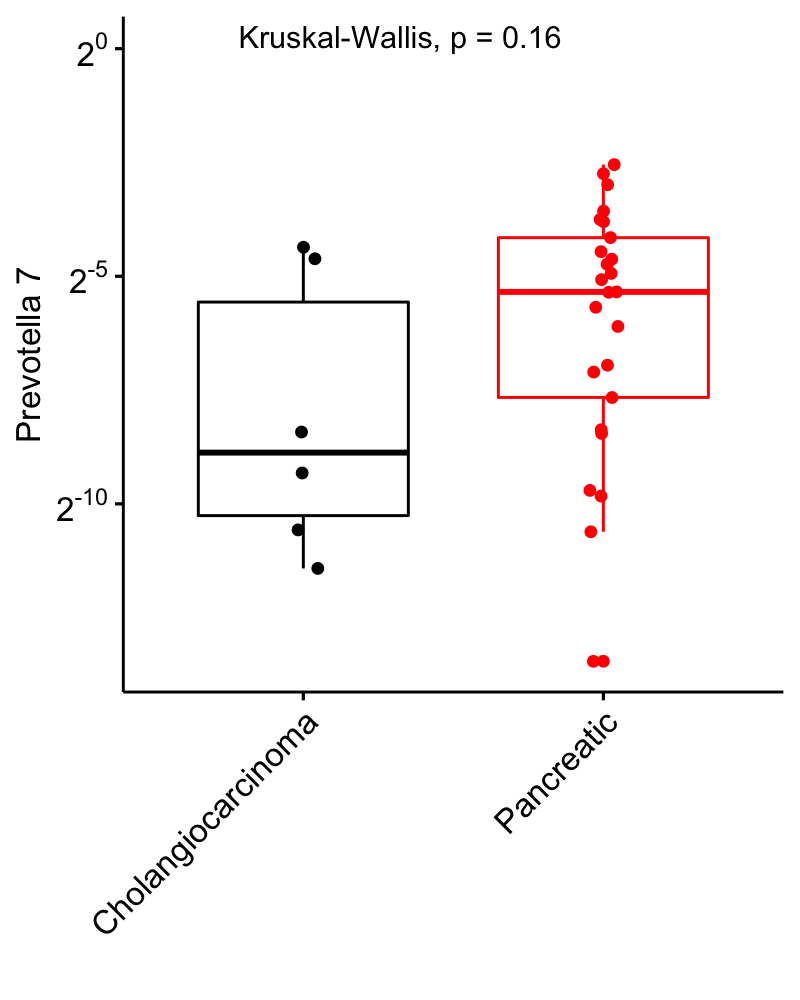

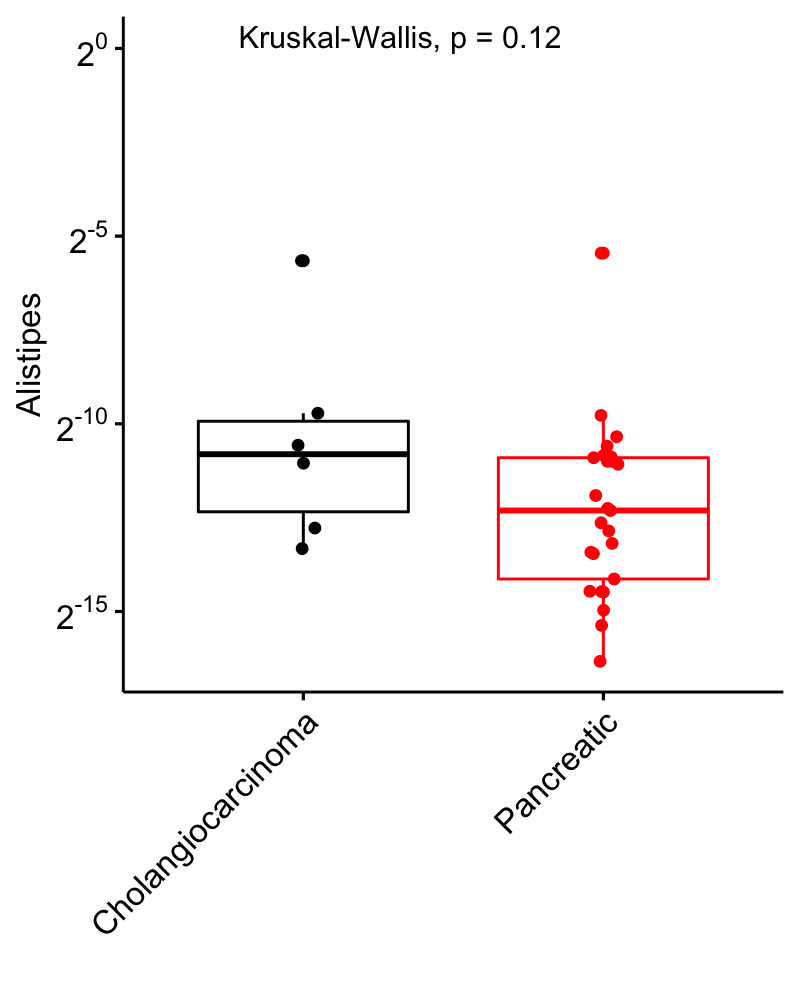

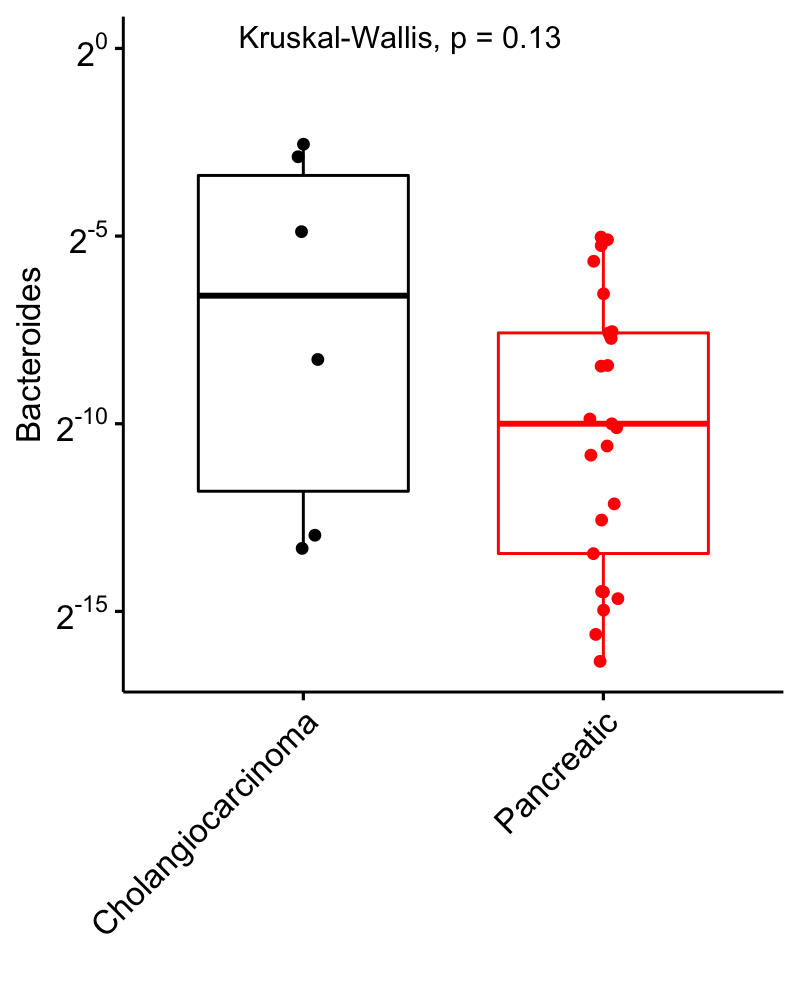

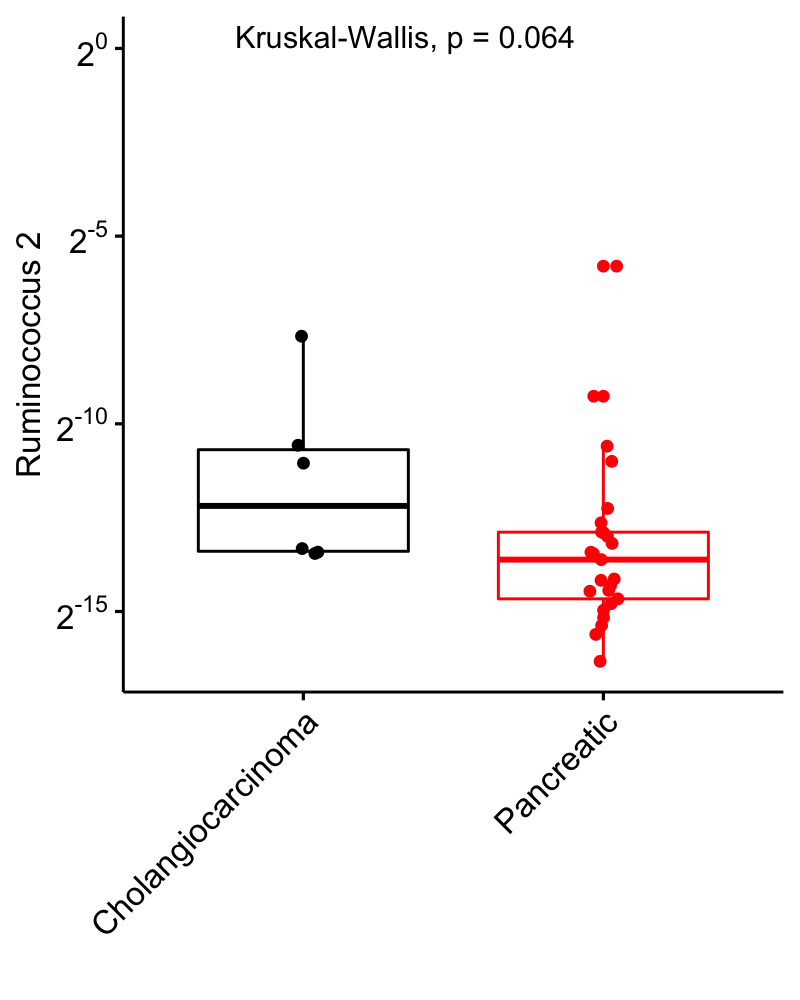

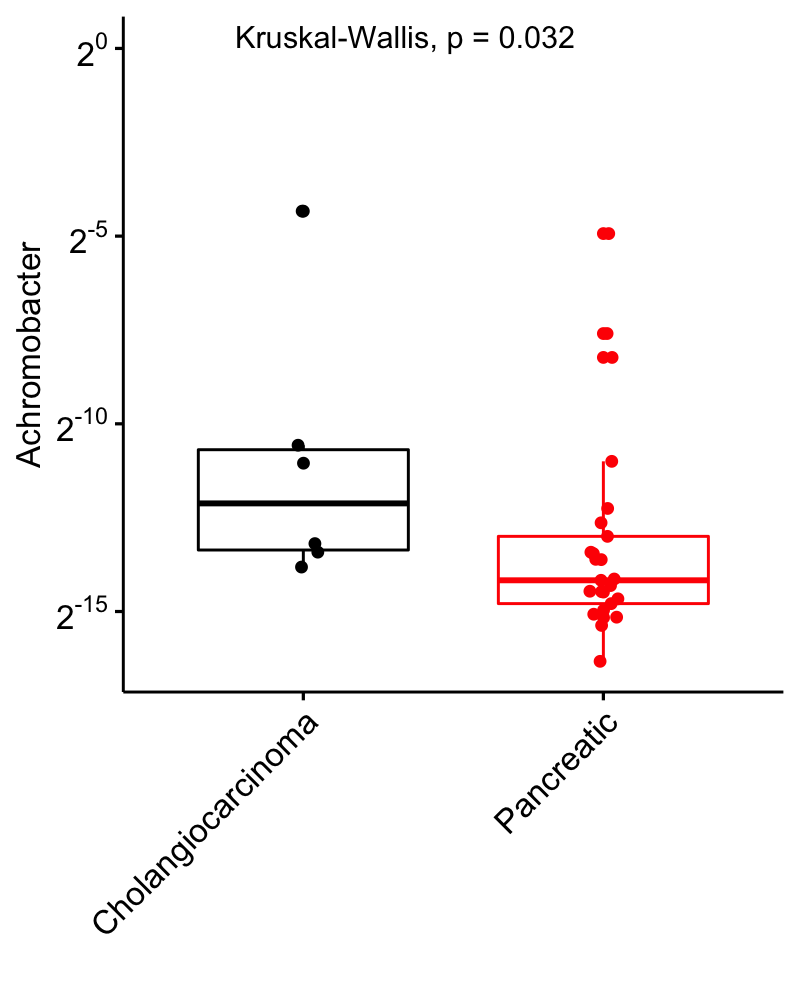

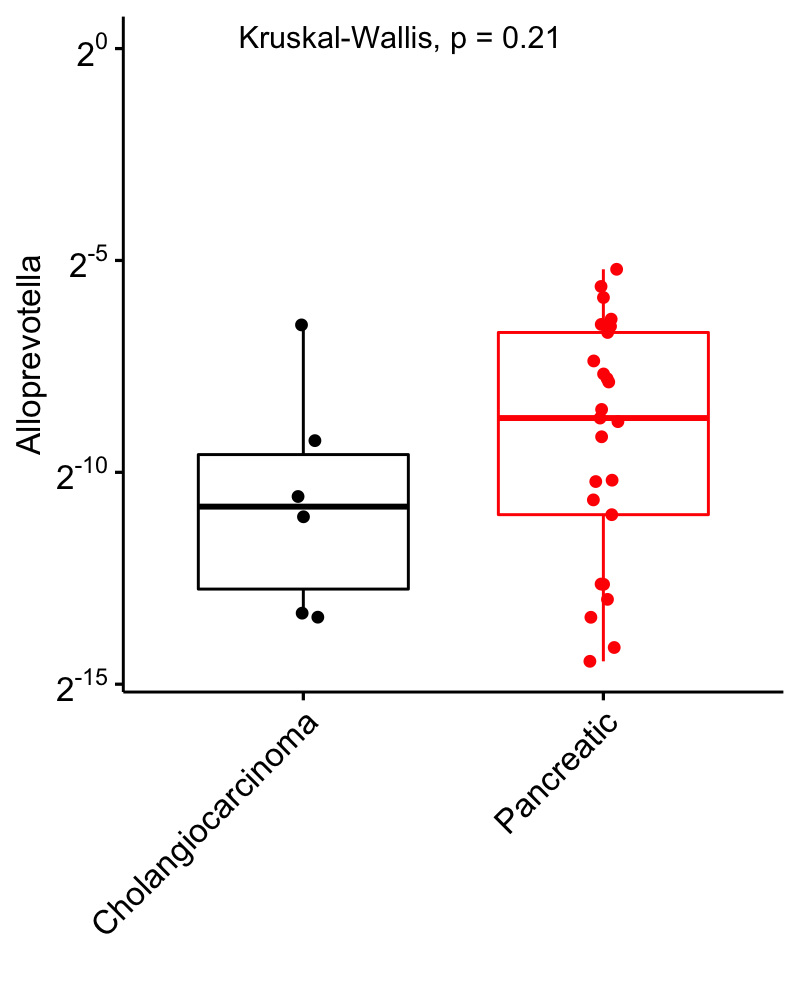

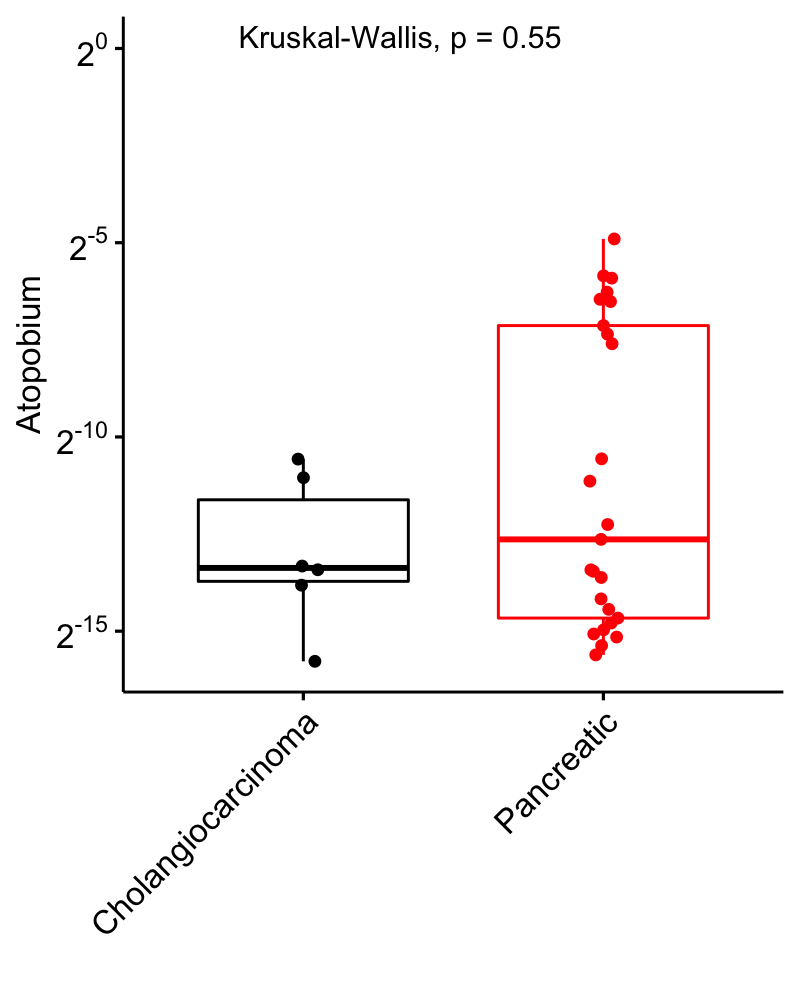

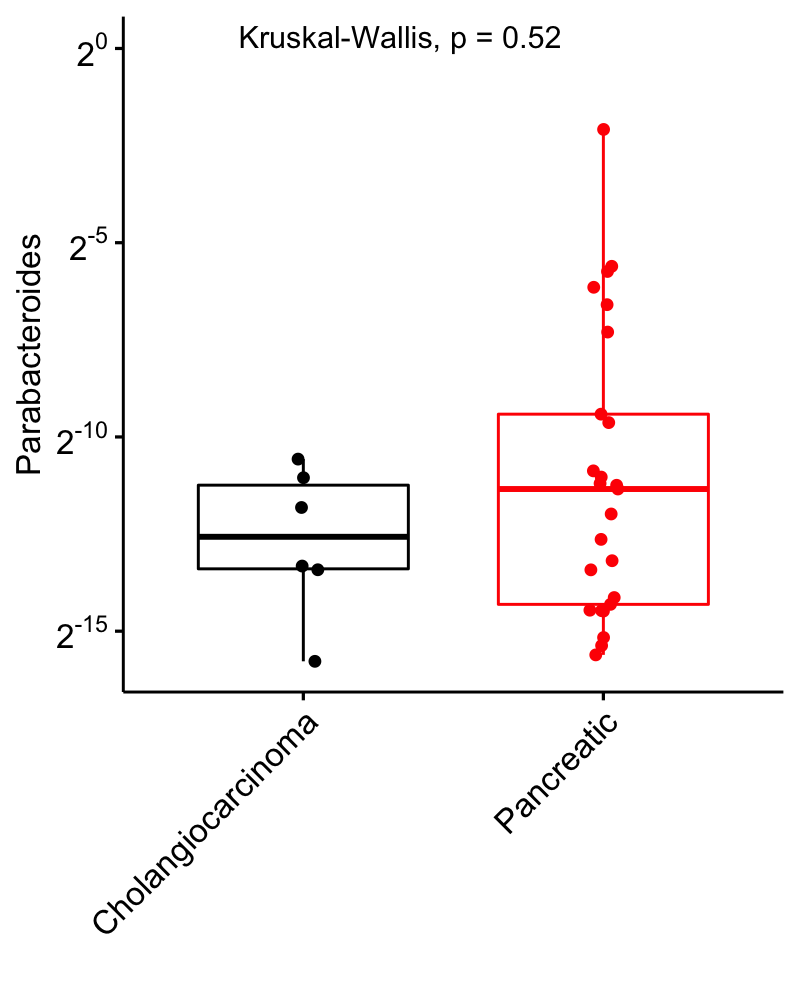

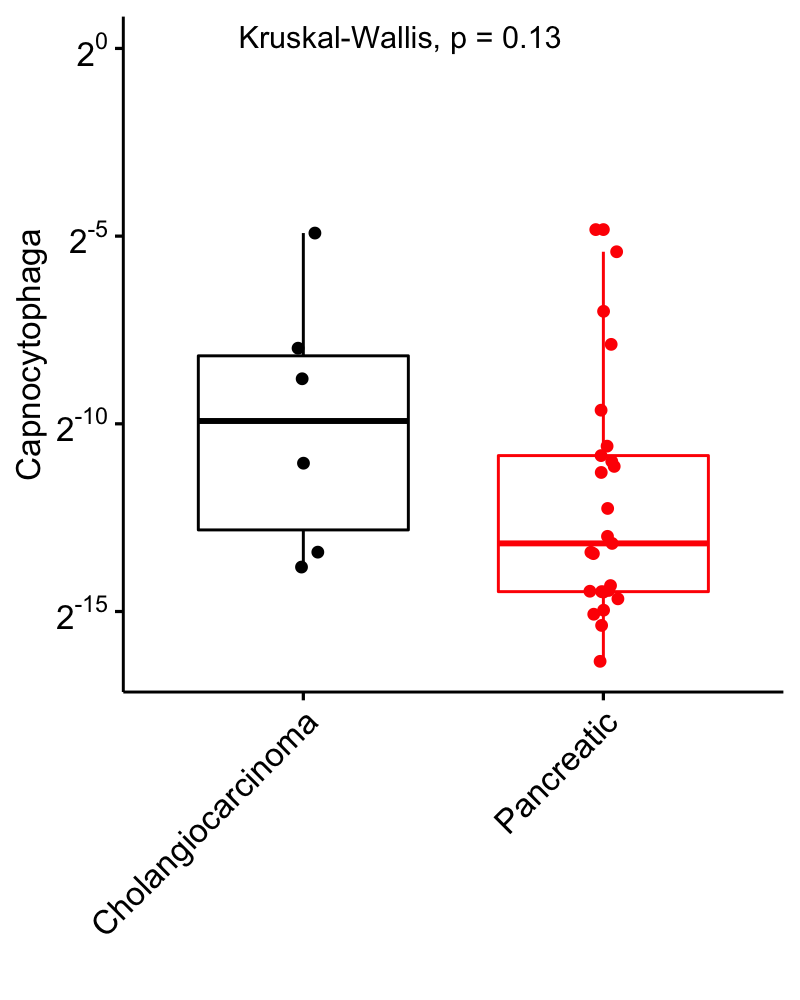

OTU36_Rothia                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
data        2.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 1.000000e+00, 2.000000e+00, 1.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 1.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 1.000000e+00, 1.000000e+00, 2.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,

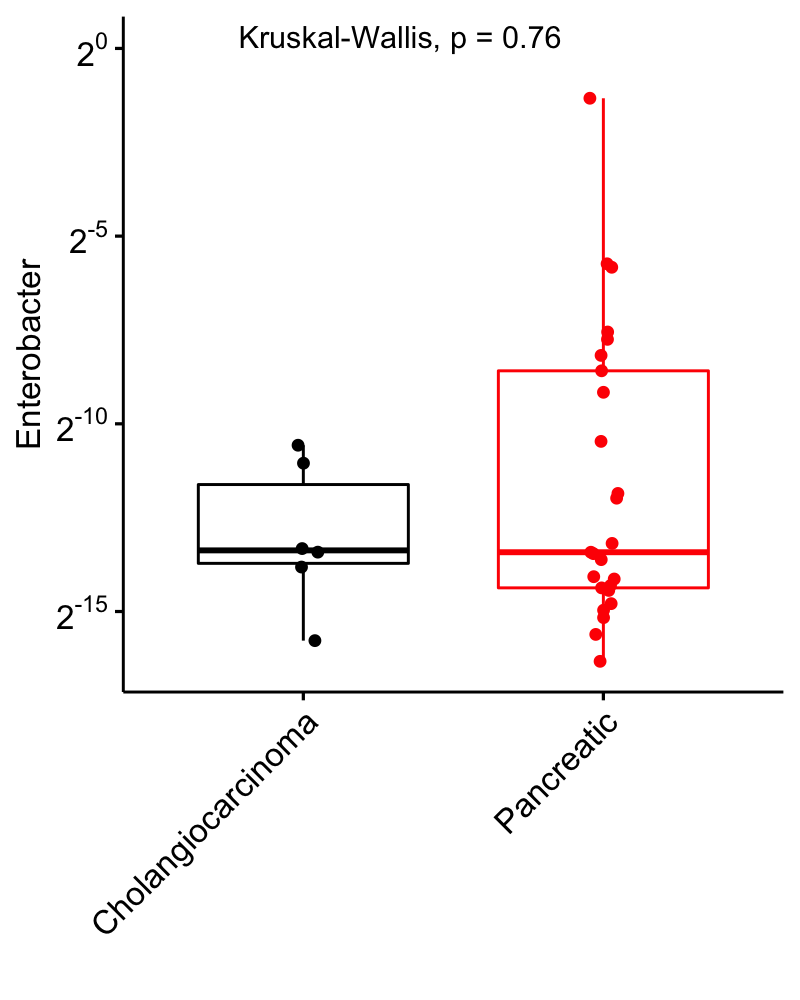

In [84]:
sapply( rownames(selectVar(data.splsda, comp = 1)$value), function(x){print( plot_abundance(data.TSS, Y, x)) } )

In [85]:
pdf("boxplots_KW_pc_vs_cc_01.pdf", onefile = T)
sapply( rownames(selectVar(data.splsda, comp = 1)$value), function(x){print( plot_abundance(data.TSS, Y, x)) } )
dev.off()

OTU36_Rothia                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
data        2.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 1.000000e+00, 2.000000e+00, 1.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 1.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 1.000000e+00, 1.000000e+00, 2.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,

pdf 
  2